#### Import 

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
#from google.colab.data_table import DataTable
import geopandas as gpd
from matplotlib.lines import Line2D
pd.set_option('display.max_columns', 100)
#DataTable.max_columns = 1000
import warnings
warnings.filterwarnings("ignore")

In [237]:
import plotly.graph_objects as go
import plotly.express as px
from statsmodels.nonparametric.kde import KDEUnivariate
import plotly.figure_factory as ff

In [238]:
#from google.colab import drive
#drive.mount('/content/drive')

## Import data

In [239]:
url = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-dataset/main/data/OxCGRT_compact_national_v1.csv'

df = pd.read_csv(url)

## Data Description and Wrangling

In [240]:
print('The shape of our dataset is {}.'.format(df.shape))
print('Displaying the first 5 entries')
df.head()

The shape of our dataset is (202760, 56).
Displaying the first 5 entries


CountryName CountryCode  RegionName  RegionCode Jurisdiction      Date  \
0       Aruba         ABW         NaN         NaN    NAT_TOTAL  20200101   
1       Aruba         ABW         NaN         NaN    NAT_TOTAL  20200102   
2       Aruba         ABW         NaN         NaN    NAT_TOTAL  20200103   
3       Aruba         ABW         NaN         NaN    NAT_TOTAL  20200104   
4       Aruba         ABW         NaN         NaN    NAT_TOTAL  20200105   

   C1M_School closing  C1M_Flag  C2M_Workplace closing  C2M_Flag  \
0                 0.0       NaN                    0.0       NaN   
1                 0.0       NaN                    0.0       NaN   
2                 0.0       NaN                    0.0       NaN   
3                 0.0       NaN                    0.0       NaN   
4                 0.0       NaN                    0.0       NaN   

   C3M_Cancel public events  C3M_Flag  C4M_Restrictions on gatherings  \
0                       0.0       NaN                             0.0   
1                       0.0       NaN                             0.0   
2                       0.0       NaN                             0.0   
3                       0.0       NaN                             0.0   
4                       0.0       NaN                             0.0   

   C4M_Flag  C5M_Close public transport  C5M_Flag  \
0       NaN                         0.0       NaN   
1       NaN                         0.0       NaN   
2       NaN                         0.0       NaN   
3       NaN                         0.0       NaN   
4       NaN                         0.0       NaN   

   C6M_Stay at home requirements  C6M_Flag  \
0                            0.0       NaN   
1                            0.0       NaN   
2                            0.0       NaN   
3                            0.0       NaN   
4                            0.0       NaN   

   C7M_Restrictions on internal movement  C7M_Flag  \
0                                    0.0       NaN   
1                                    0.0       NaN   
2                                    0.0       NaN   
3                                    0.0       NaN   
4                                    0.0       NaN   

   C8EV_International travel controls  E1_Income support  E1_Flag  \
0                                 0.0                0.0      NaN   
1                                 0.0                0.0      NaN   
2                                 0.0                0.0      NaN   
3                                 0.0                0.0      NaN   
4                                 0.0                0.0      NaN   

   E2_Debt/contract relief  E3_Fiscal measures  E4_International support  \
0                      0.0                 0.0                       0.0   
1                      0.0                 0.0                       0.0   
2                      0.0                 0.0                       0.0   
3                      0.0                 0.0                       0.0   
4                      0.0                 0.0                       0.0   

   H1_Public information campaigns  H1_Flag  H2_Testing policy  \
0                              0.0      NaN                0.0   
1                              0.0      NaN                0.0   
2                              0.0      NaN                0.0   
3                              0.0      NaN                0.0   
4                              0.0      NaN                0.0   

   H3_Contact tracing  H4_Emergency investment in healthcare  \
0                 0.0                                    0.0   
1                 0.0                                    0.0   
2                 0.0                                    0.0   
3                 0.0                                    0.0   
4                 0.0                                    0.0   

   H5_Investment in vaccines  H6M_Facial Coverings  H6M_Flag  \
0                        0.0                   0.0       N

##### View the output of df.head() in a tabular format.

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202760 entries, 0 to 202759
Data columns (total 56 columns):
 #   Column                                                                           Non-Null Count   Dtype  
---  ------                                                                           --------------   -----  
 0   CountryName                                                                      202760 non-null  object 
 1   CountryCode                                                                      202760 non-null  object 
 2   RegionName                                                                       0 non-null       float64
 3   RegionCode                                                                       0 non-null       float64
 4   Jurisdiction                                                                     202760 non-null  object 
 5   Date                                                                             202760 non-null  int64  
 



*   Columns 'RegionName' and 'RegionCode' will be dropped since they contain 0 non-null entries.
*  Column 'CountryName' is dropped to avoid redundancy.



#### Converting 'Date' to datetime.

In [242]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
start_date = df['Date'].min()
end_date = df['Date'].max()
print("Start Date: {}, End Date: {}".format(start_date,end_date))

Start Date: 2020-01-01 00:00:00, End Date: 2022-12-31 00:00:00


In [243]:
df = df.drop(columns=['RegionName','RegionCode','CountryName'])
print(df.shape)

(202760, 53)


#### Population Data from OWID

In [244]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
owid = pd.read_csv(url)


In [245]:
owid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390613 entries, 0 to 390612
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    390613 non-null  object 
 1   continent                                   371945 non-null  object 
 2   location                                    390613 non-null  object 
 3   date                                        390613 non-null  object 
 4   total_cases                                 351749 non-null  float64
 5   new_cases                                   379668 non-null  float64
 6   new_cases_smoothed                          378438 non-null  float64
 7   total_deaths                                329441 non-null  float64
 8   new_deaths                                  379991 non-null  float64
 9   new_deaths_smoothed                         378761 non-null  float64
 

In [246]:
countries = df['CountryCode'].unique()
print("Number of countries in the dataset: ", len(countries))

countriesOWID = owid['iso_code'].unique()
print("Number of countries in owid dataset: ", len(countriesOWID))

Number of countries in the dataset:  185
Number of countries in owid dataset:  255


In [247]:
countriesWithPopData = np.intersect1d(countries, countriesOWID)
missing_countries = np.setdiff1d(countries, countriesWithPopData)
print(missing_countries)

['RKS']


In [248]:
df = df[~df['CountryCode'].isin(missing_countries)]

In [249]:
df.shape

(201664, 53)

In [250]:
owid['date'] = pd.to_datetime(owid['date'], format='%Y-%m-%d')

additional_data = owid[owid['iso_code'].isin(countriesWithPopData) & 
                    (owid['date'] >= start_date) & 
                    (owid['date'] <= end_date)][['iso_code', 'date', 'population', 'gdp_per_capita']]

In [251]:
additional_data[additional_data['iso_code'] == 'AFG']

iso_code       date  population  gdp_per_capita
0         AFG 2020-01-05  41128772.0        1803.987
1         AFG 2020-01-06  41128772.0        1803.987
2         AFG 2020-01-07  41128772.0        1803.987
3         AFG 2020-01-08  41128772.0        1803.987
4         AFG 2020-01-09  41128772.0        1803.987
...       ...        ...         ...             ...
1087      AFG 2022-12-27  41128772.0        1803.987
1088      AFG 2022-12-28  41128772.0        1803.987
1089      AFG 2022-12-29  41128772.0        1803.987
1090      AFG 2022-12-30  41128772.0        1803.987
1091      AFG 2022-12-31  41128772.0        1803.987

[1092 rows x 4 columns]

In [252]:
additional_data.isna().sum()

iso_code              0
date                  0
population            0
gdp_per_capita    12001
dtype: int64

In [253]:
additional_data.nunique()

iso_code           184
date              1096
population         184
gdp_per_capita     173
dtype: int64

In [254]:
num_unique_values = additional_data.groupby('iso_code')['gdp_per_capita'].nunique()
countriesWithNoGDP = num_unique_values[num_unique_values < 1].index
countriesWithNoGDP

Index(['AND', 'CUB', 'FRO', 'GRL', 'GUM', 'LIE', 'MCO', 'SOM', 'SYR', 'TWN',
       'VIR'],
      dtype='object', name='iso_code')

In [255]:
additional_data = additional_data[~additional_data['iso_code'].isin(countriesWithNoGDP)]
additional_data.isna().sum()

iso_code          0
date              0
population        0
gdp_per_capita    0
dtype: int64

In [256]:
df = df.merge(additional_data, left_on=['CountryCode', 'Date'], right_on=['iso_code','date'], how='left')

In [257]:
df.head()

CountryCode Jurisdiction       Date  C1M_School closing  C1M_Flag  \
0         ABW    NAT_TOTAL 2020-01-01                 0.0       NaN   
1         ABW    NAT_TOTAL 2020-01-02                 0.0       NaN   
2         ABW    NAT_TOTAL 2020-01-03                 0.0       NaN   
3         ABW    NAT_TOTAL 2020-01-04                 0.0       NaN   
4         ABW    NAT_TOTAL 2020-01-05                 0.0       NaN   

   C2M_Workplace closing  C2M_Flag  C3M_Cancel public events  C3M_Flag  \
0                    0.0       NaN                       0.0       NaN   
1                    0.0       NaN                       0.0       NaN   
2                    0.0       NaN                       0.0       NaN   
3                    0.0       NaN                       0.0       NaN   
4                    0.0       NaN                       0.0       NaN   

   C4M_Restrictions on gatherings  C4M_Flag  C5M_Close public transport  \
0                             0.0       NaN                         0.0   
1                             0.0       NaN                         0.0   
2                             0.0       NaN                         0.0   
3                             0.0       NaN                         0.0   
4                             0.0       NaN                         0.0   

   C5M_Flag  C6M_Stay at home requirements  C6M_Flag  \
0       NaN                            0.0       NaN   
1       NaN                            0.0       NaN   
2       NaN                            0.0       NaN   
3       NaN                            0.0       NaN   
4       NaN                            0.0       NaN   

   C7M_Restrictions on internal movement  C7M_Flag  \
0                                    0.0       NaN   
1                                    0.0       NaN   
2                                    0.0       NaN   
3                                    0.0       NaN   
4                                    0.0       NaN   

   C8EV_International travel controls  E1_Income support  E1_Flag  \
0                                 0.0                0.0      NaN   
1                                 0.0                0.0      NaN   
2                                 0.0                0.0      NaN   
3                                 0.0                0.0      NaN   
4                                 0.0                0.0      NaN   

   E2_Debt/contract relief  E3_Fiscal measures  E4_International support  \
0                      0.0                 0.0                       0.0   
1                      0.0                 0.0                       0.0   
2                      0.0                 0.0                       0.0   
3                      0.0                 0.0                       0.0   
4                      0.0                 0.0                       0.0   

   H1_Public information campaigns  H1_Flag  H2_Testing policy  \
0                              0.0      NaN                0.0   
1                              0.0      NaN                0.0   
2                              0.0      NaN                0.0   
3                              0.0      NaN                0.0   
4                              0.0      NaN                0.0   

   H3_Contact tracing  H4_Emergency investment in healthcare  \
0                 0.0                                    0.0   
1                 0.0                                    0.0   
2                 0.0                                    0.0   
3                 0.0                                    0.0   
4                 0.0                                    0.0   

   H5_Investment in vaccines  H6M_Facial Coverings  H6M_Flag  \
0                        0.0                   0.0       NaN   
1                        0.0                   0.0       NaN   
2                        0.0                   0.0       NaN   
3                        0.0                   0.0       NaN   
4                        0.0               

In [258]:
population_values = df.loc[df['Date'] == pd.Timestamp('2020-01-05')].groupby('CountryCode')['population'].first().to_dict()
gdp_values = df.loc[df['Date'] == pd.Timestamp('2020-01-05')].groupby('CountryCode')['gdp_per_capita'].first().to_dict()

column_values = {
    'population': population_values,
    'gdp_per_capita': gdp_values
}

mask = (df['Date'] < pd.Timestamp('2020-01-05'))

for column, values in column_values.items():
    df.loc[mask, column] = df.loc[mask, 'CountryCode'].map(values)

In [259]:
df.head()

CountryCode Jurisdiction       Date  C1M_School closing  C1M_Flag  \
0         ABW    NAT_TOTAL 2020-01-01                 0.0       NaN   
1         ABW    NAT_TOTAL 2020-01-02                 0.0       NaN   
2         ABW    NAT_TOTAL 2020-01-03                 0.0       NaN   
3         ABW    NAT_TOTAL 2020-01-04                 0.0       NaN   
4         ABW    NAT_TOTAL 2020-01-05                 0.0       NaN   

   C2M_Workplace closing  C2M_Flag  C3M_Cancel public events  C3M_Flag  \
0                    0.0       NaN                       0.0       NaN   
1                    0.0       NaN                       0.0       NaN   
2                    0.0       NaN                       0.0       NaN   
3                    0.0       NaN                       0.0       NaN   
4                    0.0       NaN                       0.0       NaN   

   C4M_Restrictions on gatherings  C4M_Flag  C5M_Close public transport  \
0                             0.0       NaN                         0.0   
1                             0.0       NaN                         0.0   
2                             0.0       NaN                         0.0   
3                             0.0       NaN                         0.0   
4                             0.0       NaN                         0.0   

   C5M_Flag  C6M_Stay at home requirements  C6M_Flag  \
0       NaN                            0.0       NaN   
1       NaN                            0.0       NaN   
2       NaN                            0.0       NaN   
3       NaN                            0.0       NaN   
4       NaN                            0.0       NaN   

   C7M_Restrictions on internal movement  C7M_Flag  \
0                                    0.0       NaN   
1                                    0.0       NaN   
2                                    0.0       NaN   
3                                    0.0       NaN   
4                                    0.0       NaN   

   C8EV_International travel controls  E1_Income support  E1_Flag  \
0                                 0.0                0.0      NaN   
1                                 0.0                0.0      NaN   
2                                 0.0                0.0      NaN   
3                                 0.0                0.0      NaN   
4                                 0.0                0.0      NaN   

   E2_Debt/contract relief  E3_Fiscal measures  E4_International support  \
0                      0.0                 0.0                       0.0   
1                      0.0                 0.0                       0.0   
2                      0.0                 0.0                       0.0   
3                      0.0                 0.0                       0.0   
4                      0.0                 0.0                       0.0   

   H1_Public information campaigns  H1_Flag  H2_Testing policy  \
0                              0.0      NaN                0.0   
1                              0.0      NaN                0.0   
2                              0.0      NaN                0.0   
3                              0.0      NaN                0.0   
4                              0.0      NaN                0.0   

   H3_Contact tracing  H4_Emergency investment in healthcare  \
0                 0.0                                    0.0   
1                 0.0                                    0.0   
2                 0.0                                    0.0   
3                 0.0                                    0.0   
4                 0.0                                    0.0   

   H5_Investment in vaccines  H6M_Facial Coverings  H6M_Flag  \
0                        0.0                   0.0       NaN   
1                        0.0                   0.0       NaN   
2                        0.0                   0.0       NaN   
3                        0.0                   0.0       NaN   
4                        0.0               

In [260]:
df.shape

(201664, 57)

In [261]:
non_datetime_columns = df.select_dtypes(exclude=['datetime64[ns]']).columns

values_of_each_column = {col: df[col].value_counts(dropna=False) for col in non_datetime_columns}

values_of_each_column

{'CountryCode': CountryCode
 ABW    1096
 OMN    1096
 MYS    1096
 NAM    1096
 NER    1096
        ... 
 GIN    1096
 GMB    1096
 GRC    1096
 GRL    1096
 ZWE    1096
 Name: count, Length: 184, dtype: int64,
 'Jurisdiction': Jurisdiction
 NAT_TOTAL    201664
 Name: count, dtype: int64,
 'C1M_School closing': C1M_School closing
 0.0    74426
 1.0    55439
 3.0    41060
 2.0    30739
 Name: count, dtype: int64,
 'C1M_Flag': C1M_Flag
 1.0    106116
 NaN     74426
 0.0     21122
 Name: count, dtype: int64,
 'C2M_Workplace closing': C2M_Workplace closing
 0.0    68862
 2.0    63829
 1.0    51701
 3.0    17272
 Name: count, dtype: int64,
 'C2M_Flag': C2M_Flag
 1.0    105720
 NaN     68862
 0.0     27082
 Name: count, dtype: int64,
 'C3M_Cancel public events': C3M_Cancel public events
 2.0    84447
 0.0    64114
 1.0    53103
 Name: count, dtype: int64,
 'C3M_Flag': C3M_Flag
 1.0    117991
 NaN     64114
 0.0     19559
 Name: count, dtype: int64,
 'C4M_Restrictions on gatherings': C4M_Res


*   We've 1096 entries for each country, having a total of 185 countries represented in this dataset.
*   Dropping 'Jurisdiction' since it has only one unique value.



In [262]:
df = df.drop(columns=['Jurisdiction','iso_code','date'])
print(df.shape)

(201664, 54)


#### Converting object dtypes to categorical

Useful for plotting V2B, V2C and Majority Vaccinated.

In [263]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')


### Renaming columns

In [264]:

df.columns = [col.split('_')[0] if ' ' in col else col for col in df.columns]
df = df.rename(columns={'population': 'Population', 'gdp_per_capita':'GDP_Per_Capita'})
df.head(1)

CountryCode       Date  C1M  C1M_Flag  C2M  C2M_Flag  C3M  C3M_Flag  C4M  \
0         ABW 2020-01-01  0.0       NaN  0.0       NaN  0.0       NaN  0.0   

   C4M_Flag  C5M  C5M_Flag  C6M  C6M_Flag  C7M  C7M_Flag  C8EV   E1  E1_Flag  \
0       NaN  0.0       NaN  0.0       NaN  0.0       NaN   0.0  0.0      NaN   

    E2   E3   E4   H1  H1_Flag   H2   H3   H4   H5  H6M  H6M_Flag   H7  \
0  0.0  0.0  0.0  0.0      NaN  0.0  0.0  0.0  0.0  0.0       NaN  0.0   

   H7_Flag  H8M  H8M_Flag  V1  V2A  V2B  V2C  V2D  V2E_Education  V2F  V2G  \
0      NaN  0.0       NaN   0    0  NaN  NaN  NaN            NaN  NaN  NaN   

   V3  V4  ConfirmedCases  ConfirmedDeaths MajorityVaccinated  \
0   0 NaN             0.0              0.0                 NV   

   PopulationVaccinated  StringencyIndex_Average  \
0                   0.0                      0.0   

   GovernmentResponseIndex_Average  ContainmentHealthIndex_Average  \
0                              0.0                             0.0   

   EconomicSupportIndex  Population  GDP_Per_Capita  
0                   0.0    106459.0       35973.781

In [265]:
df.shape

(201664, 54)

In [266]:
df.dtypes

CountryCode                              category
Date                               datetime64[ns]
C1M                                       float64
C1M_Flag                                  float64
C2M                                       float64
C2M_Flag                                  float64
C3M                                       float64
C3M_Flag                                  float64
C4M                                       float64
C4M_Flag                                  float64
C5M                                       float64
C5M_Flag                                  float64
C6M                                       float64
C6M_Flag                                  float64
C7M                                       float64
C7M_Flag                                  float64
C8EV                                      float64
E1                                        float64
E1_Flag                                   float64
E2                                        float64


### Dealing With Missing Values

In [267]:
na_values = df.isna().sum()

In [268]:
fig = go.Figure(layout=go.Layout(
        autosize=False,
        width=800,
        height=800
    ))
fig.add_trace(go.Bar(
    y = na_values.index,
    x = na_values.values,
    customdata = na_values.values,
    orientation='h'
))

fig.update_layout(
    title='Number of missing values in each column',
    xaxis_title='Missing values',
    yaxis_title='Columns',
    hovermode='closest',
    yaxis=dict(
        tickmode='array',
        tickvals=list(range(len(na_values.index))),
        ticktext=na_values.index
    )
)

fig.show()

In [110]:
missing_values = df.isnull().groupby(df['CountryCode']).any()
missing_values

CountryCode   Date    C1M  C1M_Flag    C2M  C2M_Flag    C3M  \
CountryCode                                                                
ABW                False  False  False      True  False      True  False   
AFG                False  False  False      True  False      True  False   
AGO                False  False  False      True  False      True  False   
ALB                False  False  False      True  False      True  False   
AND                False  False  False      True  False      True  False   
...                  ...    ...    ...       ...    ...       ...    ...   
VUT                False  False  False      True  False      True  False   
YEM                False  False  False      True  False      True  False   
ZAF                False  False  False      True  False      True  False   
ZMB                False  False  False      True  False      True  False   
ZWE                False  False  False      True  False      True  False   

             C3M_Flag    C4M  C4M_Flag    C5M  C5M_Flag    C6M  C6M_Flag  \
CountryCode                                                                
ABW              True  False      True  False      True  False      True   
AFG              True  False      True  False      True  False      True   
AGO              True  False      True  False      True  False      True   
ALB              True  False      True  False      True  False      True   
AND              True  False      True  False      True  False      True   
...               ...    ...       ...    ...       ...    ...       ...   
VUT              True  False      True  False      True  False      True   
YEM              True  False      True  False      True  False      True   
ZAF              True  False      True  False      True  False      True   
ZMB              True  False      True  False      True  False      True   
ZWE              True  False      True  False      True  False      True   

               C7M  C7M_Flag   C8EV     E1  E1_Flag     E2    E3    E4     H1  \
CountryCode                                                                     
ABW          False      True  False  False     True  False  True  True  False   
AFG          False      True  False  False     True  False  True  True  False   
AGO          False      True  False  False     True  False  True  True  False   
ALB          False      True  False  False     True  False  True  True  False   
AND          False      True  False  False     True  False  True  True  False   
...            ...       ...    ...    ...      ...    ...   ...   ...    ...   
VUT          False      True  False  False     True  False  True  True  False   
YEM          False      True  False  False     True  False  True  True  False   
ZAF          False      True  False  False     True  False  True  True  False   
ZMB          False      True  False  False     True  False  True  True  False   
ZWE          False      True  False  False     True  False  True  True  False   

             H1_Flag     H2     H3    H4     H5    H6M  H6M_Flag     H7  \
CountryCode                                                               
ABW             True  False  False  True  False  False      True  False   
AFG             True  False  False  True  False  False      True  False   
AGO             True  False  False  True  False  False      True  False   
ALB             True  False  False  True   True  False      True  False   
AND             True  False  False  True  False  False      True  False   
...              ...    ...    ...   ...    ...    ...       ...    ...   
VUT             True  False  False  True   True  False      True  False   
YEM             True  False  False  True  False  False      True  False   
ZAF             True  False  False  True   True  False      True  False   
ZMB             True  False  False  True  False  False      True  False   
ZWE             True  False  False  True   True  False      True  False   

     

In [111]:
countries_with_no_missing_values = missing_values[~missing_values.any(axis=1)].index.tolist()
countries_with_no_missing_values

[]

In [112]:
missing_values1 = df.isnull().groupby(df['CountryCode']).sum()
missing_values1


CountryCode  Date  C1M  C1M_Flag  C2M  C2M_Flag  C3M  C3M_Flag  \
CountryCode                                                                   
ABW                    0     0    0       548    0       386    0        88   
AFG                    0     0    0       610    0       351    0       325   
AGO                    0     0    0       718    0        86    0       183   
ALB                    0     0    0       296    0       298    0       313   
AND                    0     0    0       390    0       348    0       369   
...                  ...   ...  ...       ...  ...       ...  ...       ...   
VUT                    0     0    0       917    0       840    0       888   
YEM                    0     0    0       576    0       470    0       509   
ZAF                    0     0    0       392    0       278    0       268   
ZMB                    0     0    0       627    0       605    0       498   
ZWE                    0     0    0       209    0        89    0        76   

             C4M  C4M_Flag  C5M  C5M_Flag  C6M  C6M_Flag  C7M  C7M_Flag  C8EV  \
CountryCode                                                                     
ABW            0       231    0      1096    0       640    0       929     0   
AFG            0       921    0       521    0       923    0       860     0   
AGO            0       382    0       450    0       277    0       314     0   
ALB            0       313    0       949    0       376    0       960     0   
AND            0       605    0       444    0       950    0      1066     0   
...          ...       ...  ...       ...  ...       ...  ...       ...   ...   
VUT            0       894    0       888    0       888    0       840     0   
YEM            0      1096    0      1096    0       378    0       586     0   
ZAF            0       268    0       388    0       452    0       837     0   
ZMB            0       430    0      1043    0       972    0       988     0   
ZWE            0       208    0       611    0       275    0       667     0   

             E1  E1_Flag  E2   E3   E4  H1  H1_Flag  H2  H3   H4  H5  H6M  \
CountryCode                                                                 
ABW           0      404   0  515  515   0       77   0   0  515   0    0   
AFG           0     1096   0  510  510   0      565   0   0  510   0    0   
AGO           0      710   0  523  523   0       83   0   0  524   0    0   
ALB           0      384   0  511  510   0       44   0   0  523  30    0   
AND           0      350   0  516  517   0      105   0   0  516   0    0   
...          ..      ...  ..  ...  ...  ..      ...  ..  ..  ...  ..  ...   
VUT           0      861   0  502  502   0       85   0   0  502  78    0   
YEM           0     1096   0  530  530   0      283   0   0  530   0    0   
ZAF           0      139   0  503  503   0       64   0   0  503  15    0   
ZMB           0      886   0  502  502   0       51   0   0  502   0    0   
ZWE           0      768   0  503  503   0       26   0   0  518   6    0   

             H6M_Flag  H7  H7_Flag  H8M  H8M_Flag  V1  V2A   V2B  V2C  V2D  \
CountryCode                                                                  
ABW               216   0      413    0       695   0    0   413  413  413   
AFG               175   0      419    0       885   0    0   471  471  419   
AGO                99   0      428    0       745   0    0   435  435  428   
ALB                97   0      376    0       286   0    0   383  383  376   
AND               138   0      385    0        70   0    0   394  394  385   
...               ...  ..      ...  ...       ...  ..  ...   ...  ...  ...   
VUT               884   0      518    0       846   0    0   518  518  518   
YEM               489   0      475    0       814   0    0  1096  540  475   
ZAF               284   0      397    0       453   0    0   502  502  413   
ZMB               106   0      471    0      1007   0    0   664  471  

In [113]:
countries_sumMissing = missing_values1.sum(axis=1)
totalValues = 55896.0
countriesMissProb = (countries_sumMissing/totalValues) * 100
print(countriesMissProb.sort_values(ascending=True))
print(len(countriesMissProb))


CountryCode
CHN     9.360240
DEU    11.677043
HKG    12.070631
GRC    12.304995
IDN    12.471375
         ...    
TZA    27.511808
ERI    27.678188
BFA    27.774796
TKM    27.928653
BDI    28.146916
Length: 185, dtype: float64
185


#### Drop entries where 'ConfirmedCases' and 'ConfirmedDeaths' are NaNs

In [114]:
df_ccd = df

df = df.dropna(subset=['ConfirmedCases', 'ConfirmedDeaths'])
print(df.shape)

(201664, 52)


In [115]:
whichCountry = set(df_ccd['CountryCode'].unique()) - set(df['CountryCode'].unique())
print(whichCountry)

{'TKM'}


##### No data on confirmed cases and deaths for Turkmenistan.

#### Drop 'MajorityVaccinated' and 'PopulationVaccinated'.

In [116]:
#df_vacc = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv')
df_vc = df

In [117]:
df = df.dropna(subset=['MajorityVaccinated', 'PopulationVaccinated'])
print(df.shape)

(200568, 52)


In [118]:
df_vc.shape[0] - df.shape[0]

1096

In [119]:
whichCountry = set(df_vc['CountryCode'].unique()) - set(df['CountryCode'].unique())
print(whichCountry)

{'ERI'}


##### Eritrea's vaccination data is missing.

#### Removing duplicates

In [120]:
df = df.drop_duplicates()

#### Reset the index of our dataframe

In [121]:
df = df.reset_index(drop=True)

In [122]:
print(df.shape)

(200568, 52)


In [123]:
#df.to_csv('output2.csv', index=False)

#### We didn't have any duplicate entries in the dataset.

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200568 entries, 0 to 200567
Data columns (total 52 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   CountryCode                      200568 non-null  category      
 1   Date                             200568 non-null  datetime64[ns]
 2   C1M                              200568 non-null  float64       
 3   C1M_Flag                         126843 non-null  float64       
 4   C2M                              200568 non-null  float64       
 5   C2M_Flag                         132241 non-null  float64       
 6   C3M                              200568 non-null  float64       
 7   C3M_Flag                         136857 non-null  float64       
 8   C4M                              200568 non-null  float64       
 9   C4M_Flag                         124185 non-null  float64       
 10  C5M                              200568 non-

In [125]:
df

CountryCode       Date  C1M  C1M_Flag  C2M  C2M_Flag  C3M  C3M_Flag  \
0              ABW 2020-01-01  0.0       NaN  0.0       NaN  0.0       NaN   
1              ABW 2020-01-02  0.0       NaN  0.0       NaN  0.0       NaN   
2              ABW 2020-01-03  0.0       NaN  0.0       NaN  0.0       NaN   
3              ABW 2020-01-04  0.0       NaN  0.0       NaN  0.0       NaN   
4              ABW 2020-01-05  0.0       NaN  0.0       NaN  0.0       NaN   
...            ...        ...  ...       ...  ...       ...  ...       ...   
200563         ZWE 2022-12-27  1.0       1.0  2.0       1.0  1.0       1.0   
200564         ZWE 2022-12-28  1.0       1.0  2.0       1.0  1.0       1.0   
200565         ZWE 2022-12-29  1.0       1.0  2.0       1.0  1.0       1.0   
200566         ZWE 2022-12-30  1.0       1.0  2.0       1.0  1.0       1.0   
200567         ZWE 2022-12-31  1.0       1.0  2.0       1.0  1.0       1.0   

        C4M  C4M_Flag  C5M  C5M_Flag  C6M  C6M_Flag  C7M  C7M_Flag  C8EV   E1  \
0       0.0       NaN  0.0       NaN  0.0       NaN  0.0       NaN   0.0  0.0   
1       0.0       NaN  0.0       NaN  0.0       NaN  0.0       NaN   0.0  0.0   
2       0.0       NaN  0.0       NaN  0.0       NaN  0.0       NaN   0.0  0.0   
3       0.0       NaN  0.0       NaN  0.0       NaN  0.0       NaN   0.0  0.0   
4       0.0       NaN  0.0       NaN  0.0       NaN  0.0       NaN   0.0  0.0   
...     ...       ...  ...       ...  ...       ...  ...       ...   ...  ...   
200563  0.0       NaN  0.0       NaN  0.0       NaN  0.0       NaN   1.0  0.0   
200564  0.0       NaN  0.0       NaN  0.0       NaN  0.0       NaN   1.0  0.0   
200565  0.0       NaN  0.0       NaN  0.0       NaN  0.0       NaN   1.0  0.0   
200566  0.0       NaN  0.0       NaN  0.0       NaN  0.0       NaN   1.0  0.0   
200567  0.0       NaN  0.0       NaN  0.0       NaN  0.0       NaN   1.0  0.0   

        E1_Flag   E2   E3   E4   H1  H1_Flag   H2   H3   H4   H5  H6M  \
0           NaN  0.0  0.0  0.0  0.0      NaN  0.0  0.0  0.0  0.0  0.0   
1           NaN  0.0  0.0  0.0  0.0      NaN  0.0  0.0  0.0  0.0  0.0   
2           NaN  0.0  0.0  0.0  0.0      NaN  0.0  0.0  0.0  0.0  0.0   
3           NaN  0.0  0.0  0.0  0.0      NaN  0.0  0.0  0.0  0.0  0.0   
4           NaN  0.0  0.0  0.0  0.0      NaN  0.0  0.0  0.0  0.0  0.0   
...         ...  ...  ...  ...  ...      ...  ...  ...  ...  ...  ...   
200563      NaN  0.0  NaN  NaN  2.0      1.0  3.0  1.0  NaN  0.0  3.0   
200564      NaN  0.0  NaN  NaN  2.0      1.0  3.0  1.0  NaN  0.0  3.0   
200565      NaN  0.0  NaN  NaN  2.0      1.0  3.0  1.0  NaN  0.0  3.0   
200566      NaN  0.0  NaN  NaN  2.0      1.0  3.0  1.0  NaN  0.0  3.0   
200567      NaN  0.0  NaN  NaN  2.0      1.0  3.0  1.0  NaN  0.0  3.0   

        H6M_Flag   H7  H7_Flag  H8M  H8M_Flag  V1  V2A       V2B       V2C  \
0            NaN  0.0      NaN  0.0       NaN   0    0       NaN       NaN   
1            NaN  0.0      NaN  0.0       NaN   0    0       NaN       NaN   
2            NaN  0.0      NaN  0.0       NaN   0    0       NaN       NaN   
3            NaN  0.0      NaN  0.0       NaN   0    0       NaN       NaN   
4            NaN  0.0      NaN  0.0       NaN   0    0       NaN       NaN   
...          ...  ...      ...  ...       ...  ..  ...       ...       ...   
200563       1.0  5.0      1.0  0.0       NaN   2    3  5-15 yrs  5-15 yrs   
200564       1.0  5.0      1.0  0.0       NaN   2    3  5-15 yrs  5-15 yrs   
200565       1.0  5.0      1.0  0.0       NaN   2    3  5-15 yrs  5-15 yrs   
200566       1.0  5.0      1.0  0.0       NaN   2    3  5-15 yrs  5-15 yrs   
200567       1.0  5.0      1.0  0.0       NaN   2    3  5-15 yrs  5-15 yrs   

        V2D  V2E_Education  V2F  V2G  V3   V4  ConfirmedCases  \
0       NaN            NaN  NaN  NaN   0  NaN             0.0   
1       NaN            NaN  NaN  NaN   0  NaN             0.0   
2       NaN            NaN  NaN  NaN   0  NaN             0.0   
3       NaN            

### Univariate Analysis
Conducted to examine the columns in an easier and visual way.

In [126]:
helper_df = pd.read_csv('../helpers/output.csv')
helper_df['Column_Name'] = [col.split('_')[0] if ' ' in col else col for col in helper_df['Column_Name'].values]
helper_df['Column_Name'].values

array(['CountryName', 'Date', 'C1M', 'C1M_Flag', 'C2M', 'C2M_Flag', 'C3M',
       'C3M_Flag', 'C4M', 'C4M_Flag', 'C5M', 'C5M_Flag', 'C6M',
       'C6M_Flag', 'C7M', 'C7M_Flag', 'C8EV', 'E1', 'E1_Flag', 'E2', 'E3',
       'E4', 'H1', 'H1_Flag', 'H2', 'H3', 'H4', 'H5', 'H6M', 'H6M_Flag',
       'H7', 'H7_Flag', 'H8M', 'H8M_Flag', 'V1', 'V2A', 'V2B', 'V2C',
       'V2D', 'V2E_Education', 'V2F', 'V2G', 'V3', 'V4', 'ConfirmedCases',
       'ConfirmedDeaths', 'MajorityVaccinated', 'PopulationVaccinated',
       'StringencyIndex_Average', 'GovernmentResponseIndex_Average',
       'ContainmentHealthIndex_Average', 'EconomicSupportIndex'],
      dtype=object)

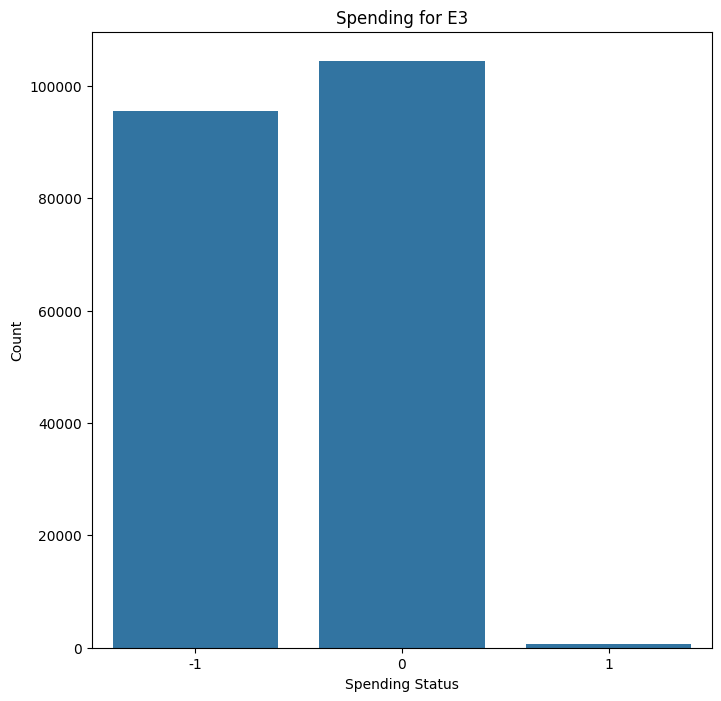

Mean : 144602108.7168565, Median : 0.0, MAX : 1957600000000.0
Corresponding Country is : USA


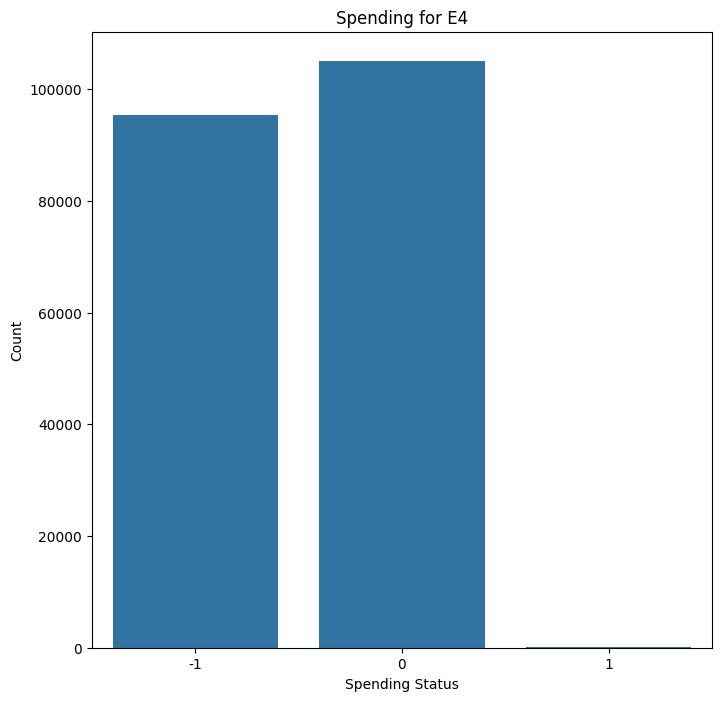

Mean : 8583940.352807585, Median : 0.0, MAX : 834353051822.0
Corresponding Country is : JPN


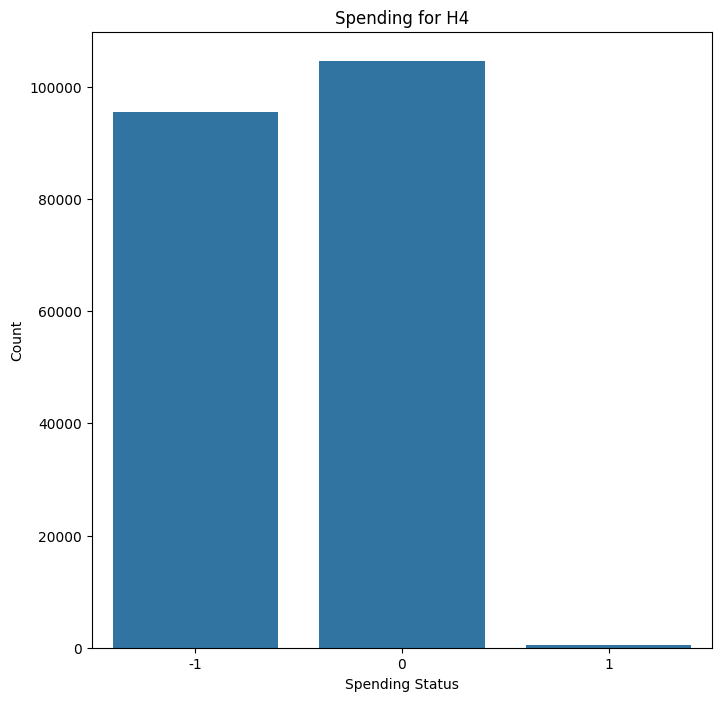

Mean : 8064995.5111537725, Median : 0.0, MAX : 242400000000.0
Corresponding Country is : USA


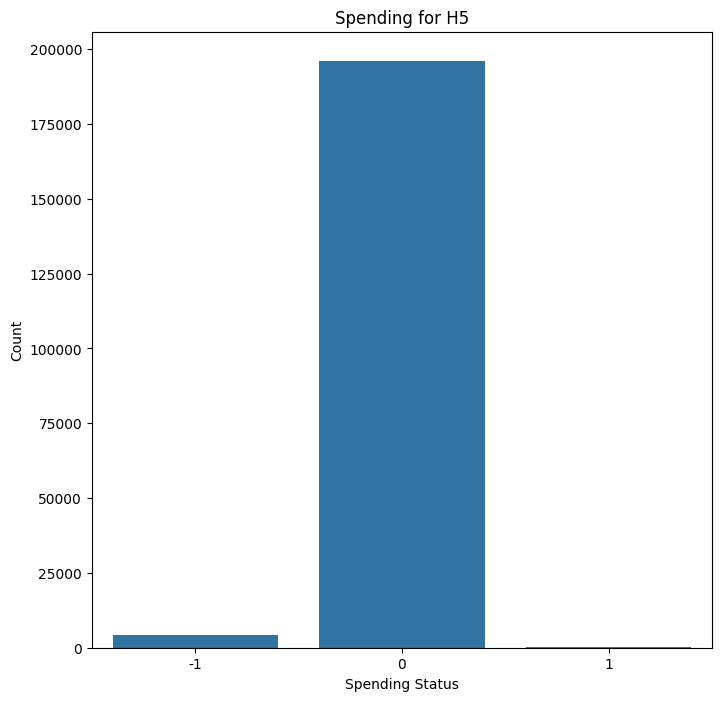

Mean : 415050.7291257457, Median : 0.0, MAX : 15750000000.0
Corresponding Country is : GBR


In [127]:
columns_here = ['E3', 'E4', 'H4', 'H5']
for column in columns_here:
    df[column + '__'] = df[column].apply(lambda x: -1 if pd.isnull(x) else (0 if x == 0 else 1))
    plt.figure(figsize=(8, 8))
    sns.countplot(x=df[column + '__'])
    #plt.legend(labels=['Missing', 'No Spending', 'Spending'], loc='upper right')
    plt.xlabel('Spending Status')
    plt.ylabel('Count')
    plt.title('Spending for ' + column)
    plt.show()
    print(f'Mean : {df[column].mean()}, Median : {df[column].median()}, MAX : {df[column].max()}')
    print(f'Corresponding Country is : {df[df[column] == df[column].max()]["CountryCode"].values[0]}')
    df.drop(column + '__', axis=1, inplace=True)

In [128]:
helper_df.columns

Index(['Column_Name', 'Description', 'Measurement', 'Coding (if given)',
       'customDescription', 'Measurement_2'],
      dtype='object')

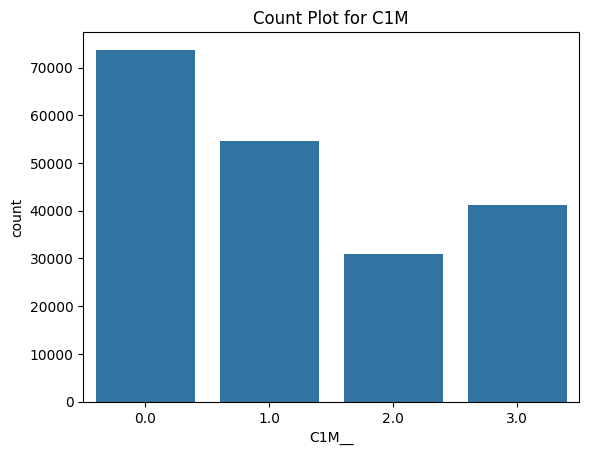

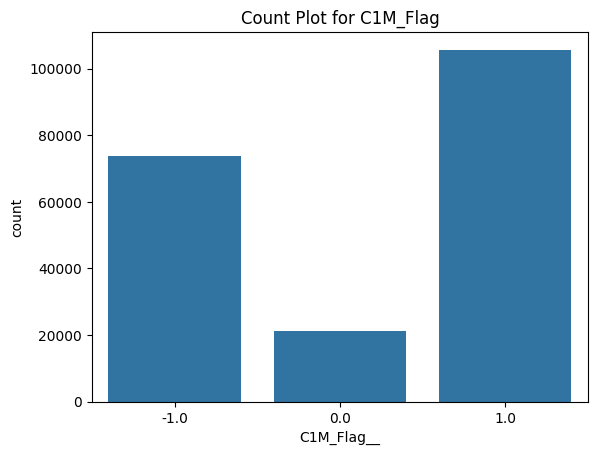

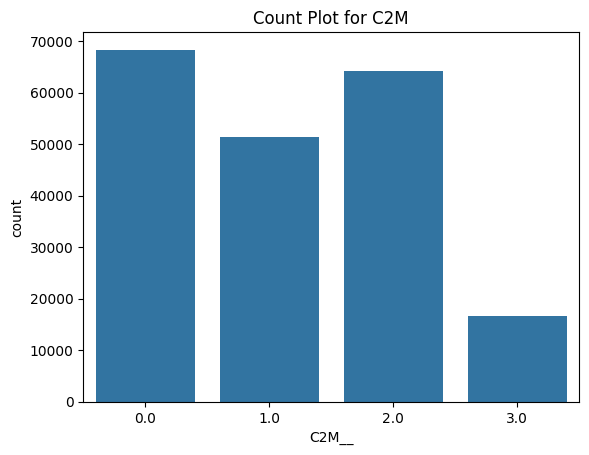

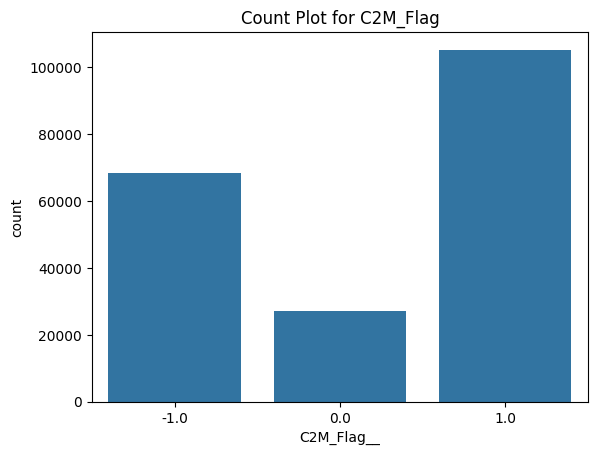

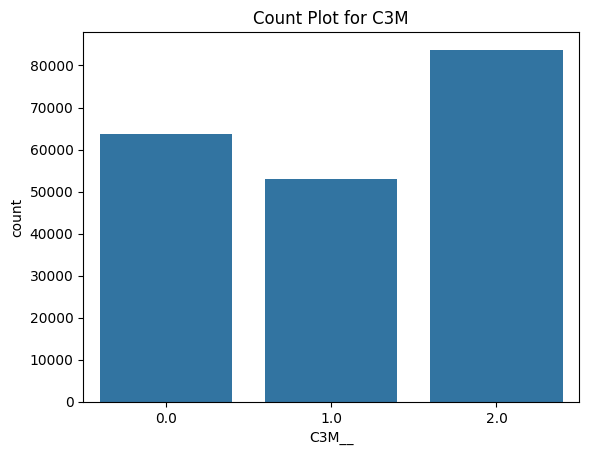

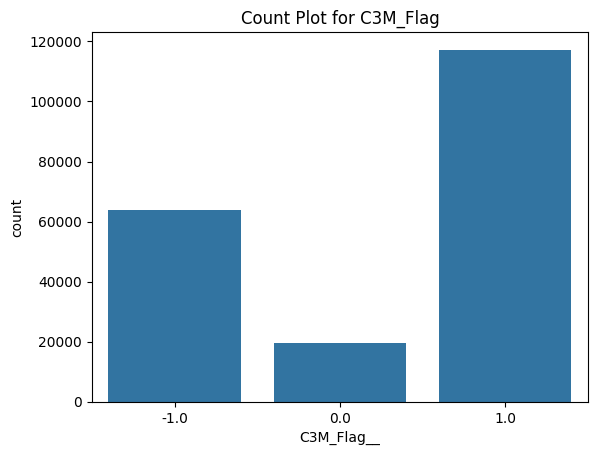

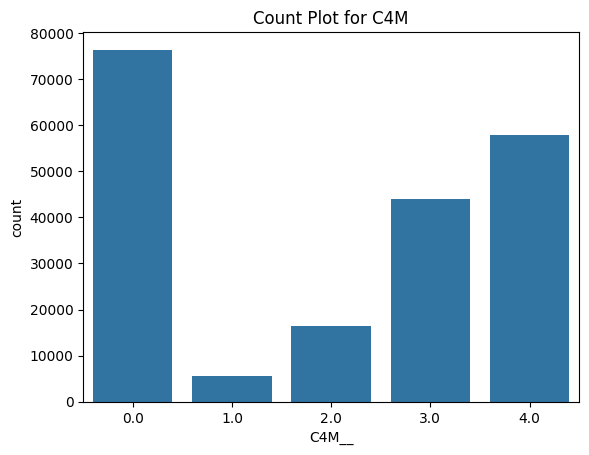

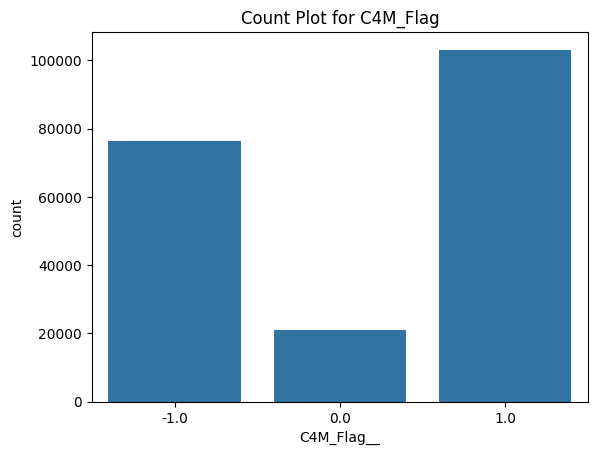

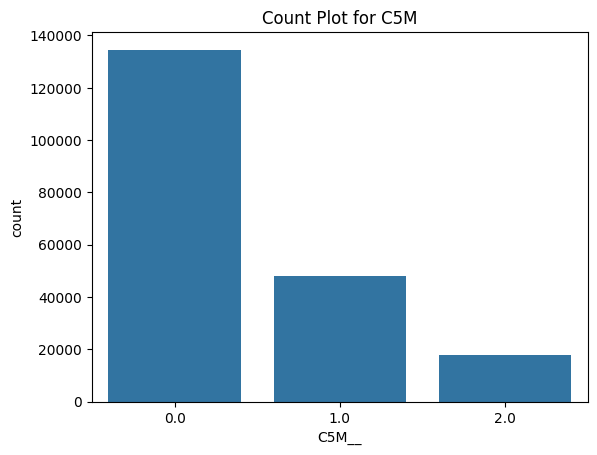

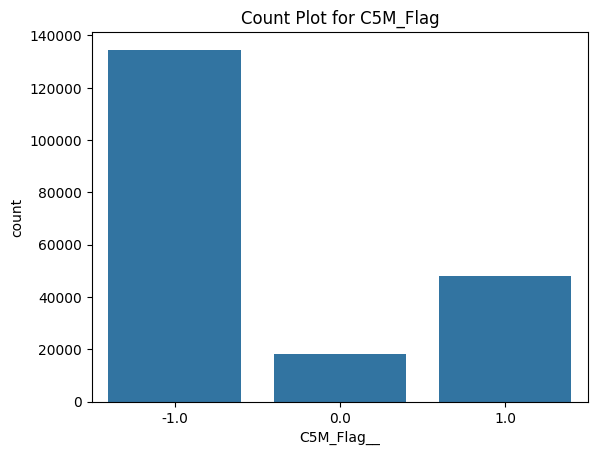

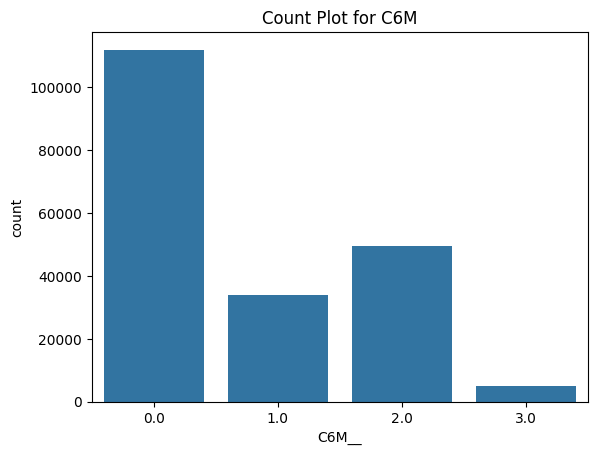

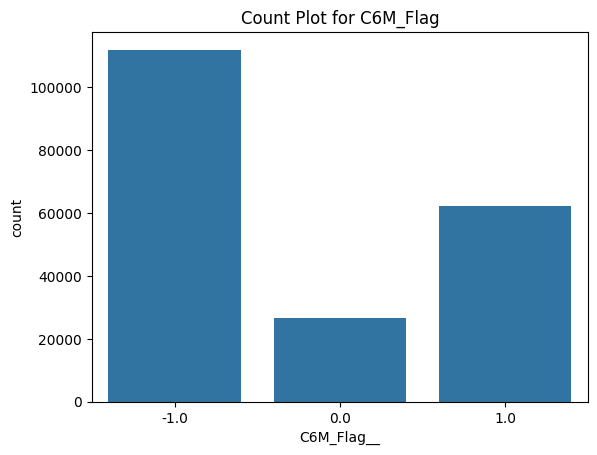

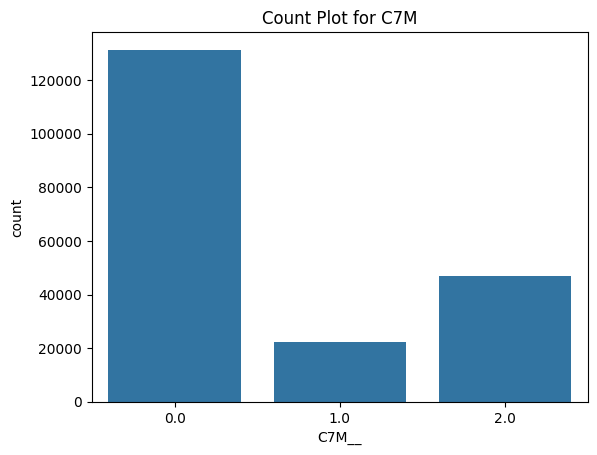

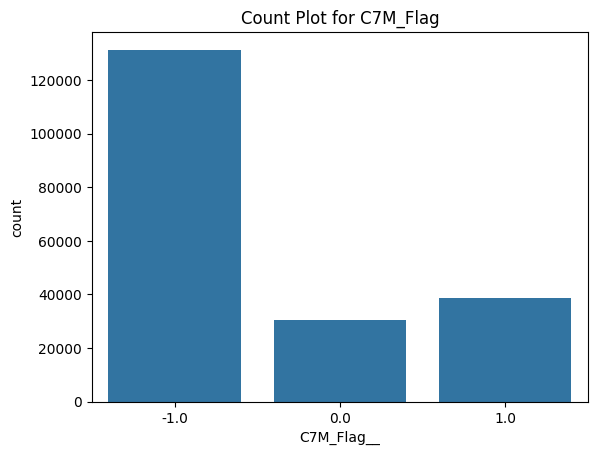

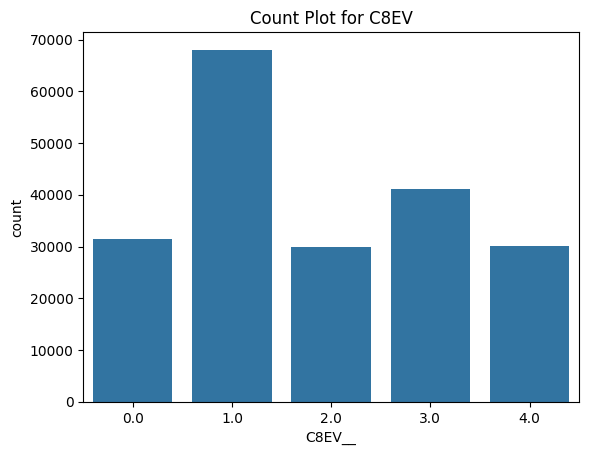

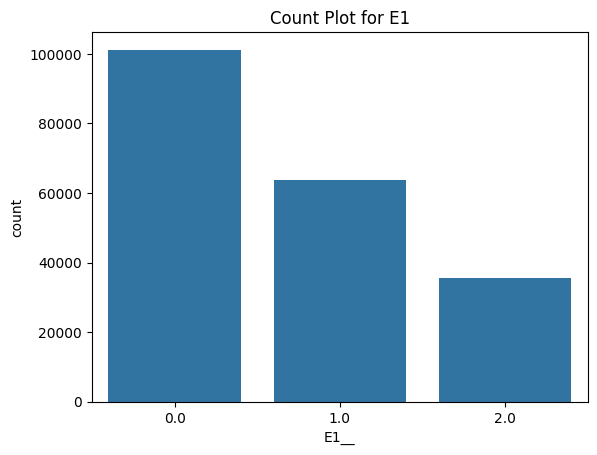

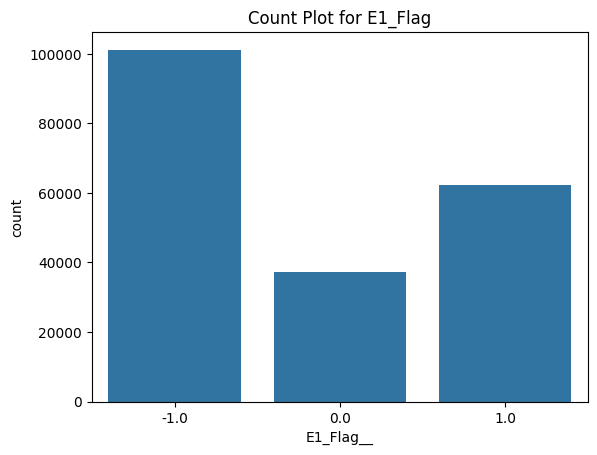

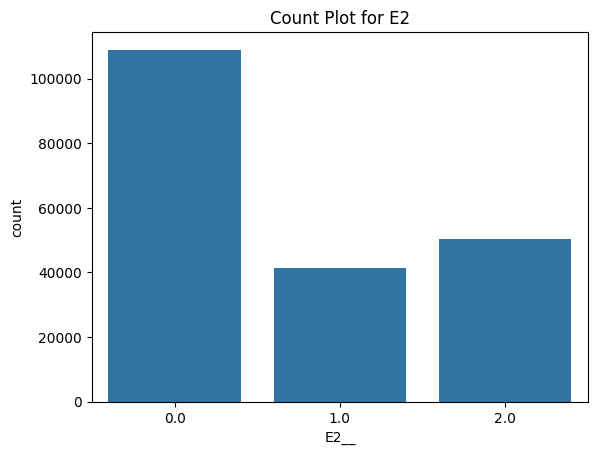

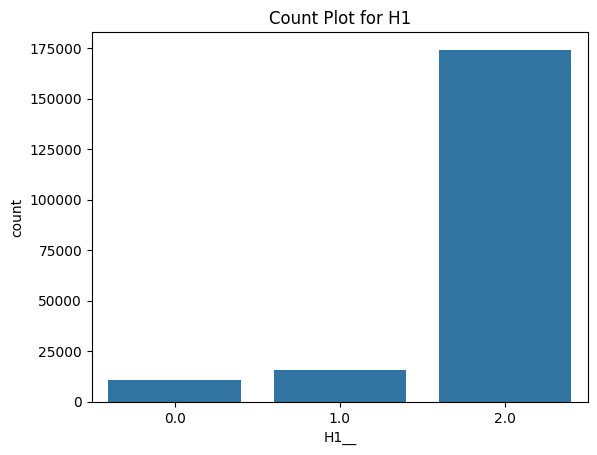

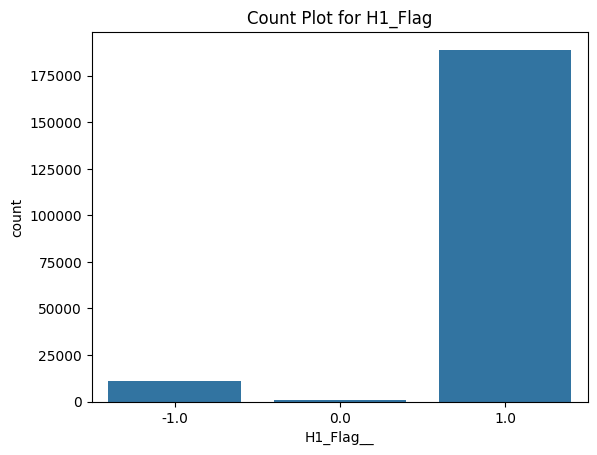

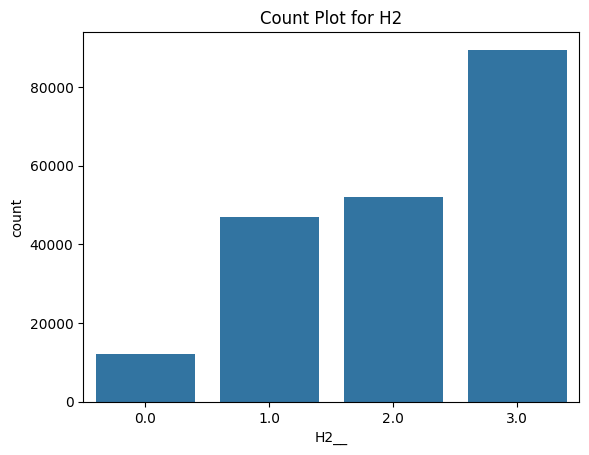

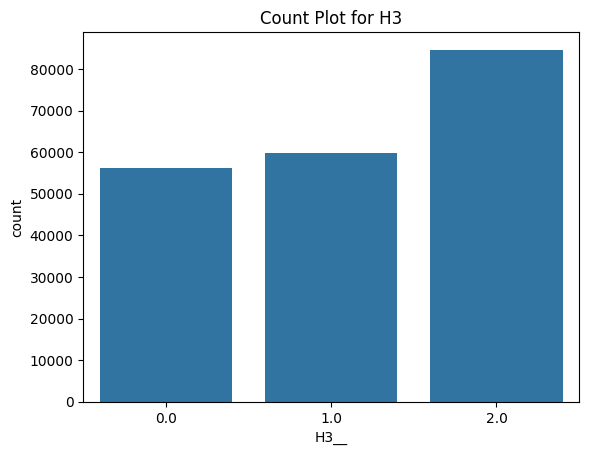

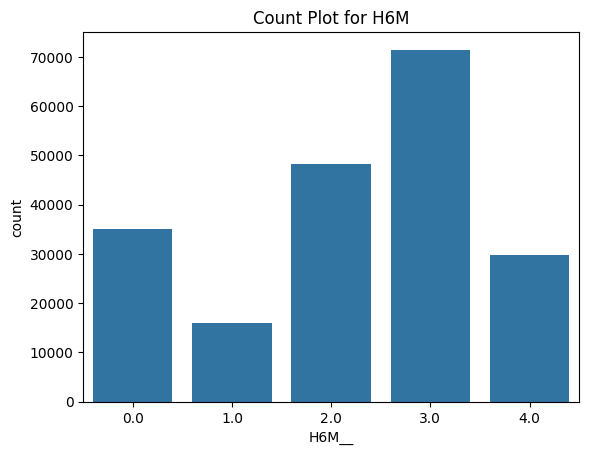

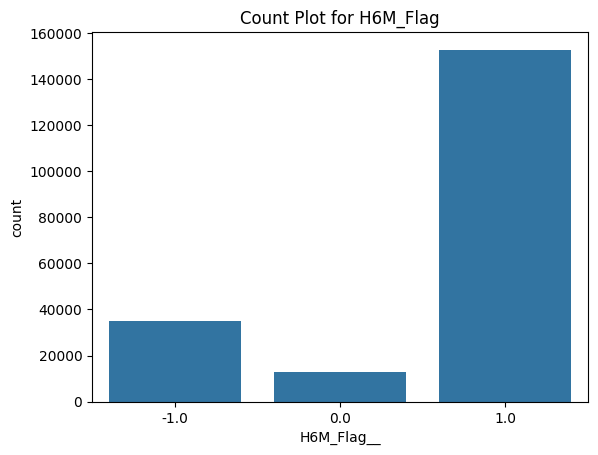

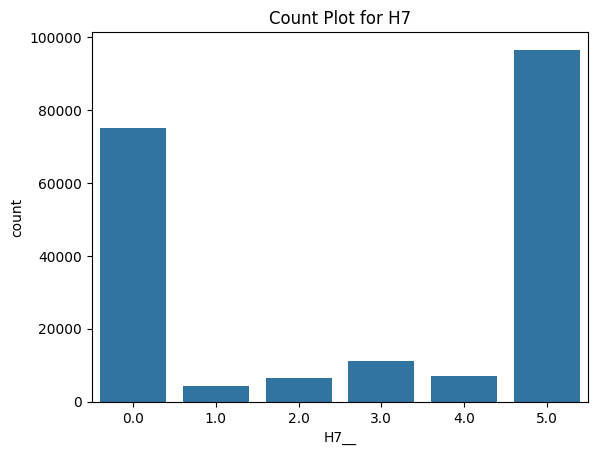

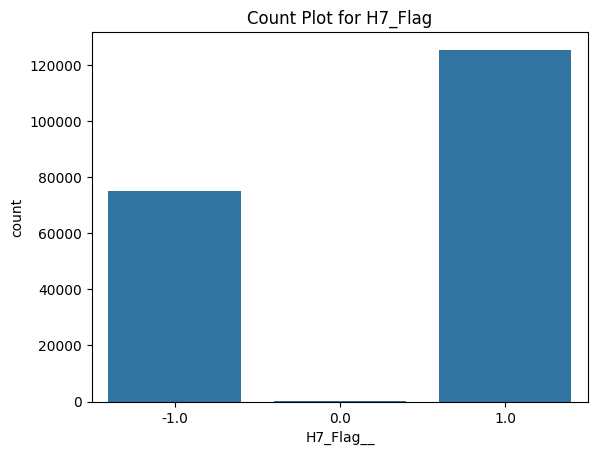

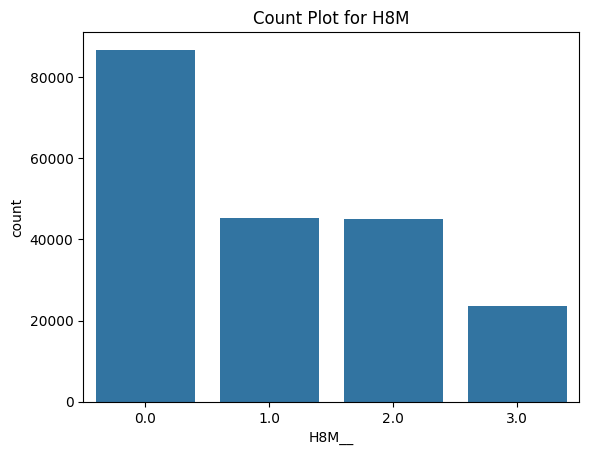

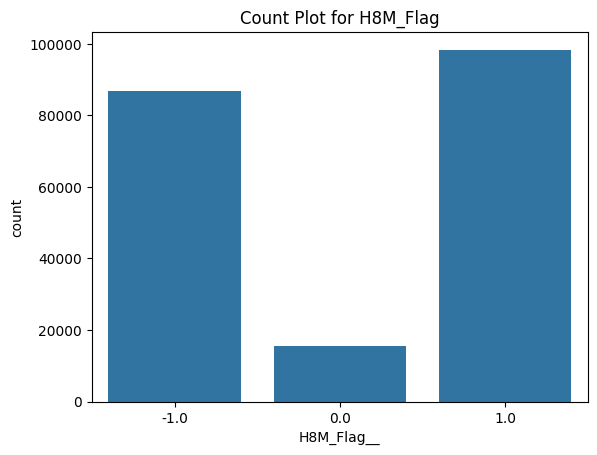

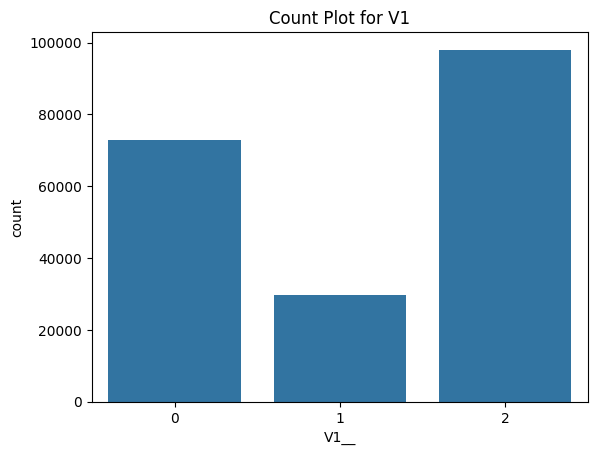

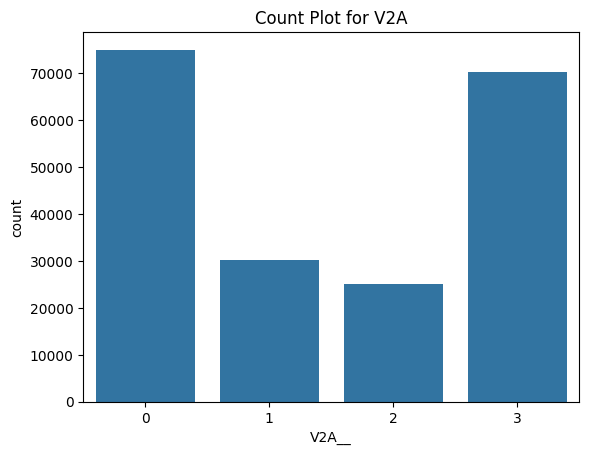

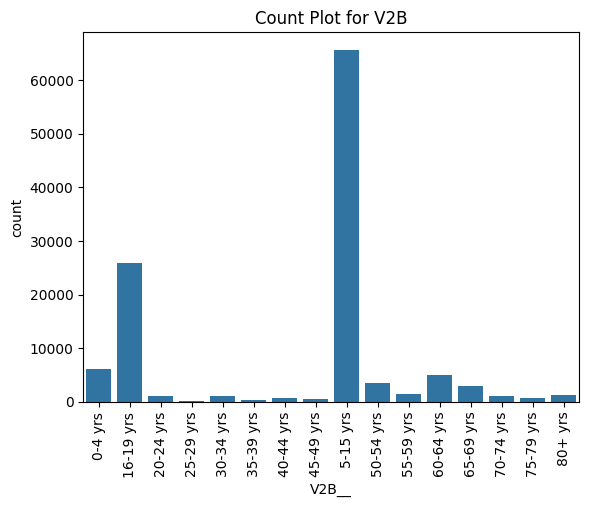

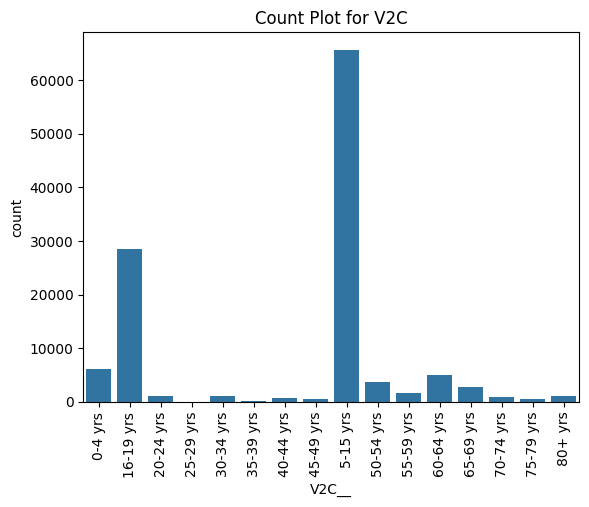

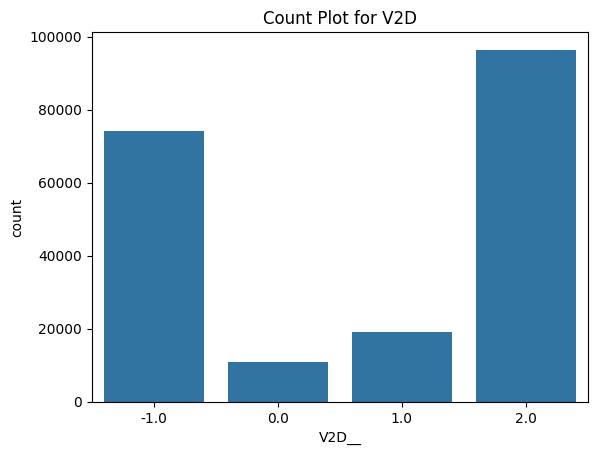

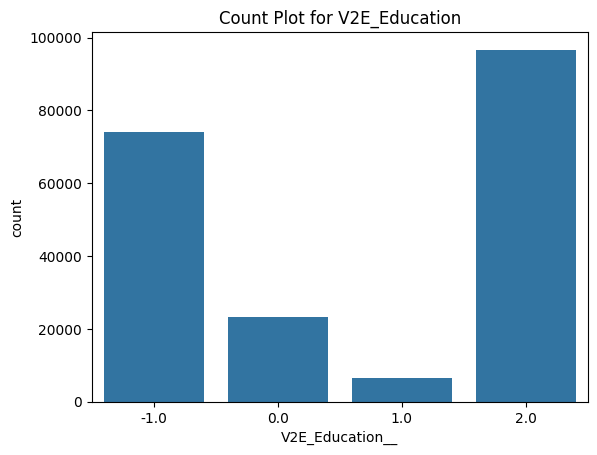

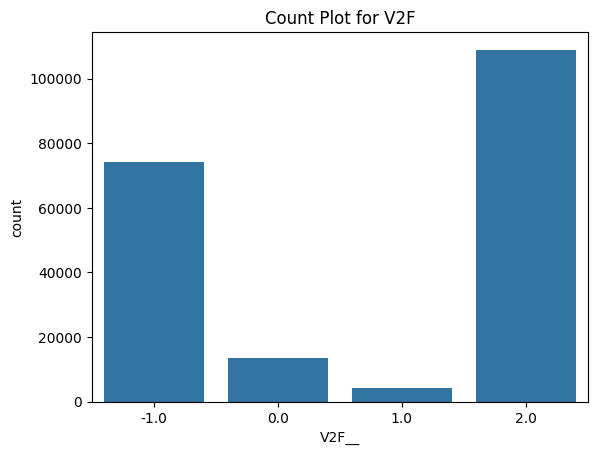

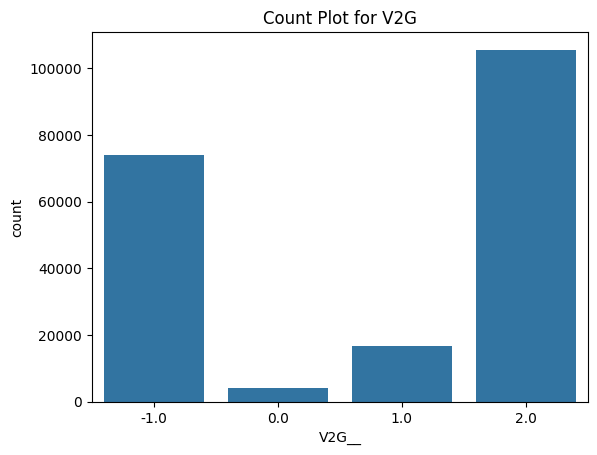

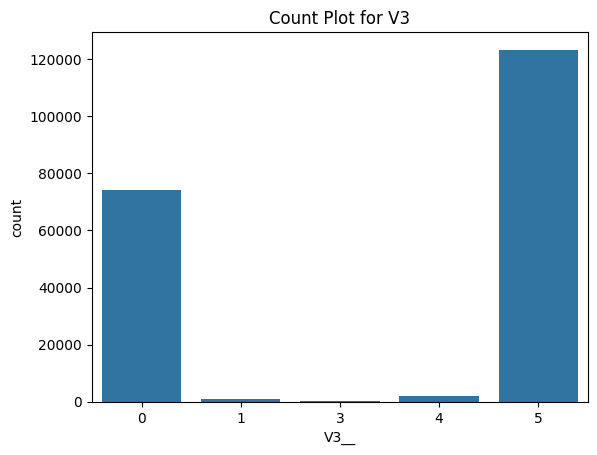

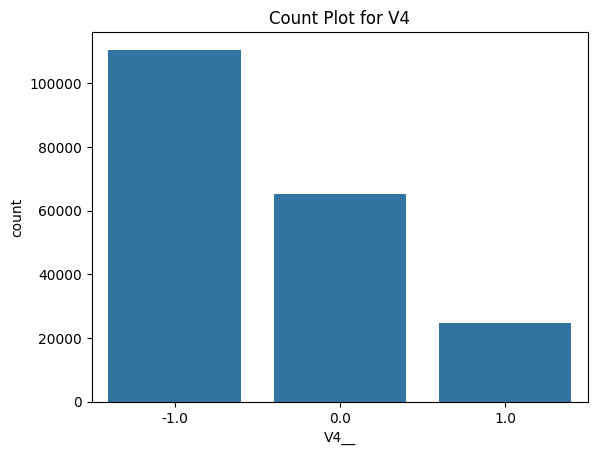

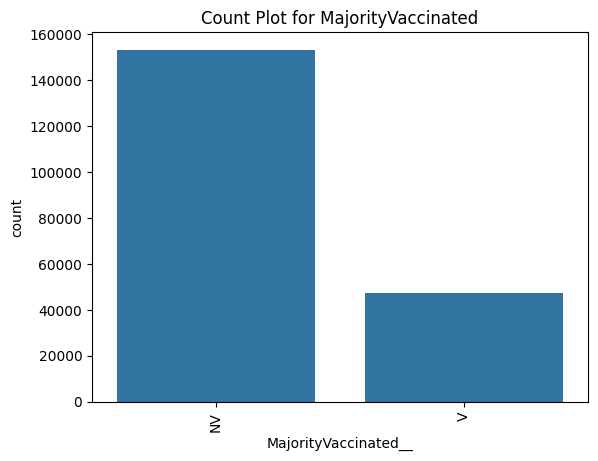

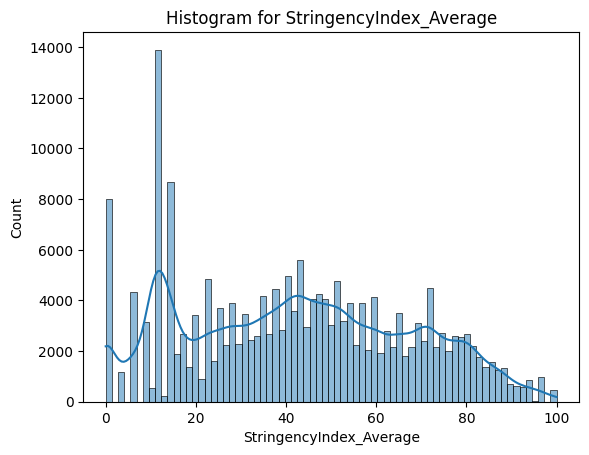

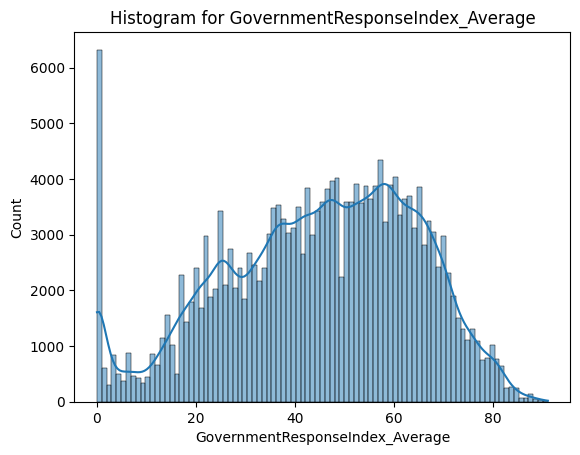

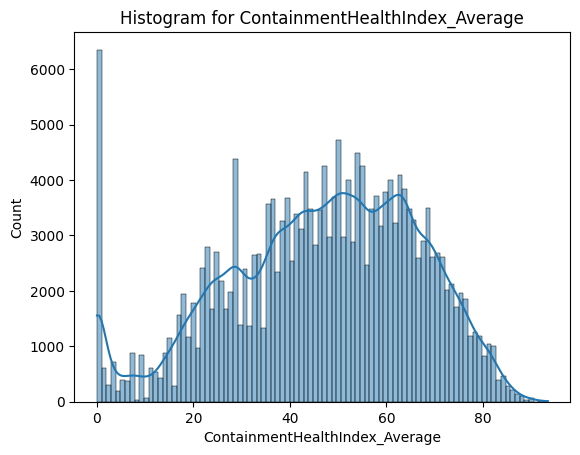

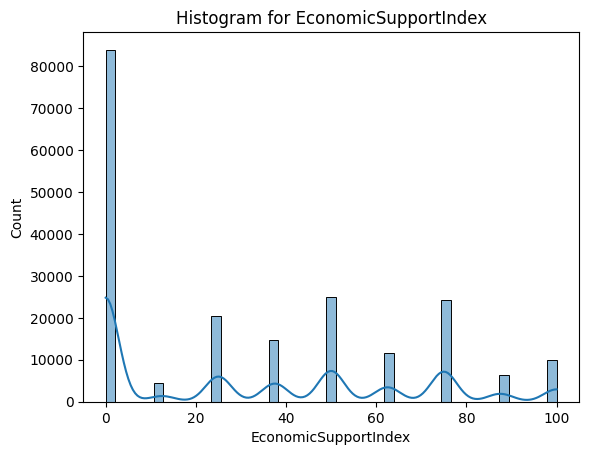

In [129]:
#helper_df = pd.read_csv('/content/drive/MyDrive/CIC/data_description.csv')
def decide_and_plot(df, column, measurement_info):
    if measurement_info in ['BinaryFlag', 'Binary', 'Categorical', 'Ordinal']:
        # Count plot for categorical and binary data
        #df[column + '_temp'] = df[column].apply(lambda x: -1 if pd.isnull(x) else x)
        if measurement_info == 'Categorical':
            df[column+'__'] = df[column].apply(lambda x: 'Missing' if pd.isnull(x) else x)
            sns.countplot(x=df[column+'__'])
            plt.title(f'Count Plot for {column}')
            plt.xticks(rotation=90)
            plt.show()
            df.drop(column+'__', axis=1, inplace=True)
        else: 
            df[column+'__'] = df[column].apply(lambda x: -1 if pd.isnull(x) else x)
            sns.countplot(data=df, x=column + '__')
            plt.title(f'Count Plot for {column}')
            plt.show()
            df.drop(column+'__', axis=1, inplace=True)
        #fig = go.Figure(data=go.Histogram(x=df[column]))
        #fig.update_layout(title_text=f'Count Plot for {column}', xaxis_title=column, yaxis_title='Count')
        #fig.show()
    elif measurement_info in ['USD', 'Number', 'Numeric', 'Numerical']:
        # Histogram for numerical data
        df[column+'__'] = df[column].apply(lambda x: -99 if pd.isnull(x) else x)
        sns.histplot(data=df, x=column, kde=True)
        plt.title(f'Histogram for {column}')
        plt.show()
        df.drop(column+'__', axis=1, inplace=True)

exclude_columns = ['Date', 'CountryName', 'ConfirmedCases', 'ConfirmedDeaths', 'PopulationVaccinated', 'E3', 'E4', 'H4', 'H5']
columns_to_plot = [col for col in df.columns if col not in exclude_columns]


for column in columns_to_plot:
    measurement_type = helper_df[helper_df['Column_Name'] == column]['Measurement_2'].values
    if measurement_type.size > 0:
        decide_and_plot(df, column, measurement_type[0])

#### Considering nationwide policies only

In [130]:
'''
# columns that end with 'Flag' but are not 'E1_Flag' or 'H7_Flag'
flag_columns = [col for col in df.columns if col.endswith('Flag') and col not in ['E1_Flag', 'H7_Flag']]

# flag columns have a value of 1,
df = df[(df[flag_columns] == 1).any(axis=1)]

df = df.drop(columns=flag_columns)

df.shape
'''

"\n# columns that end with 'Flag' but are not 'E1_Flag' or 'H7_Flag'\nflag_columns = [col for col in df.columns if col.endswith('Flag') and col not in ['E1_Flag', 'H7_Flag']]\n\n# flag columns have a value of 1,\ndf = df[(df[flag_columns] == 1).any(axis=1)]\n\ndf = df.drop(columns=flag_columns)\n\ndf.shape\n"

In [131]:
df.describe()

Date            C1M       C1M_Flag  \
count                         200568  200568.000000  126843.000000   
mean   2021-07-01 11:59:59.999999488       1.197315       0.833424   
min              2020-01-01 00:00:00       0.000000       0.000000   
25%              2020-09-30 18:00:00       0.000000       1.000000   
50%              2021-07-01 12:00:00       1.000000       1.000000   
75%              2022-04-01 06:00:00       2.000000       1.000000   
max              2022-12-31 00:00:00       3.000000       1.000000   
std                              NaN       1.141856       0.372598   

                 C2M       C2M_Flag            C3M       C3M_Flag  \
count  200568.000000  132241.000000  200568.000000  136857.000000   
mean        1.145801       0.795374       1.099901       0.857084   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       1.000000       0.000000       1.000000   
50%         1.000000       1.000000       1.000000       1.000000   
75%         2.000000       1.000000       2.000000       1.000000   
max         3.000000       1.000000       2.000000       1.000000   
std         0.985871       0.403430       0.851605       0.349988   

                 C4M       C4M_Flag            C5M      C5M_Flag  \
count  200568.000000  124185.000000  200568.000000  66010.000000   
mean        2.007384       0.830817       0.417833      0.726981   
min         0.000000       0.000000       0.000000      0.000000   
25%         0.000000       1.000000       0.000000      0.000000   
50%         3.000000       1.000000       0.000000      1.000000   
75%         4.000000       1.000000       1.000000      1.000000   
max         4.000000       1.000000       2.000000      1.000000   
std         1.710796       0.374915       0.648604      0.445514   

                 C6M      C6M_Flag            C7M      C7M_Flag  \
count  200568.000000  88611.000000  200568.000000  69238.000000   
mean        0.739400      0.701087       0.579639      0.560111   
min         0.000000      0.000000       0.000000      0.000000   
25%         0.000000      0.000000       0.000000      0.000000   
50%         0.000000      1.000000       0.000000      1.000000   
75%         2.000000      1.000000       1.000000      1.000000   
max         3.000000      1.000000       2.000000      1.000000   
std         0.915341      0.457784       0.844109      0.496377   

                C8EV             E1       E1_Flag             E2  \
count  200568.000000  200568.000000  99391.000000  200568.000000   
mean        1.854159       0.673487      0.625409       0.708029   
min         0.000000       0.000000      0.000000       0.000000   
25%         1.000000       0.000000      0.000000       0.000000   
50%         2.000000       0.000000      1.000000       0.000000   
75%         3.000000       1.000000      1.000000       2.000000   
max         4.000000       2.000000      1.000000       2.000000   
std         1.323039       0.758805      0.484020       0.841898   

                 E3            E4             H1        H1_Flag  \
count  1.051110e+05  1.051900e+05  200568.000000  189761.000000   
mean   1.446021e+08  8.583940e+06       1.814377       0.995811   
min   -1.000000e-02 -2.000000e-02       0.000000       0.000000   
25%    0.000000e+00  0.000000e+00       2.000000       1.000000   
50%    0.000000e+00  0.000000e+00       2.000000       1.000000   
75%    0.000000e+00  0.000000e+00       2.000000       1.000000   
max    1.957600e+12  8.343531e+11       2.000000       1.000000   
std    1.119601e+10  2.574995e+09       0.508854       0.064591   

                  H2             H3            H4            H5  \
count  200568.000000  200568.000000  1.050640e+05  1.962930e+05   
mean        2.090299       1.142166  8.064996e+06  4.150507e+05   
min         0.000000       0.000000 -1.000000e-02 -7.000000e-02   
25%         1.000000       0.000000  0.000000e+00  0.000000e+00   
50%       

### Imputation Strategy

Filling NaNs with mean, median or mode values at National Level. If that fails, a fallback is added to impute a global statistic.

May use it later.
Dropping it

In [132]:
'''
missing_values_count = df.isna().sum()
missing_values_count = missing_values_count[missing_values_count > 0]

column_data_types = df.dtypes

# use mean, median, or mode for imputation, based on the data type
imputation_strategy = {}
for column in missing_values_count.index:
    if column_data_types[column] in ['float64', 'int64']:
        imputation_strategy[column] = 'median'
    else:
        imputation_strategy[column] = 'mode'

# imputation with a fallback
def impute_with_fallback(series, strategy):
    if strategy == 'median':
        global_fallback = series.median()
        return series.fillna(series.groupby(df['CountryName']).transform('median').fillna(global_fallback))
    elif strategy == 'mode':
        global_fallback = series.mode().iloc[0] if not series.mode().empty else None
        return series.fillna(series.groupby(df['CountryName']).transform(lambda x: x.mode()[0] if not x.mode().empty else global_fallback))

for column, strategy in imputation_strategy.items():
    if strategy == 'median':
        df[column] = impute_with_fallback(df[column], strategy)
    elif strategy == 'mode':
        df[column] = df[column].astype('str')
        df[column] = impute_with_fallback(df[column], strategy)
        df[column] = df[column].replace('nan', np.nan)


df.isna().sum()

#still need to do it for V2B and V2C
missing_values_after_imputation = df.isna().sum()
missing_values_after_imputation = missing_values_after_imputation[missing_values_after_imputation > 0]
for column in missing_values_after_imputation.index:
    column_mode = df[column].mode()
    mode_value = column_mode.iloc[0] if not column_mode.empty else np.nan
    df[column] = df[column].fillna(mode_value)

df.isna().sum()
'''

"\nmissing_values_count = df.isna().sum()\nmissing_values_count = missing_values_count[missing_values_count > 0]\n\ncolumn_data_types = df.dtypes\n\n# use mean, median, or mode for imputation, based on the data type\nimputation_strategy = {}\nfor column in missing_values_count.index:\n    if column_data_types[column] in ['float64', 'int64']:\n        imputation_strategy[column] = 'median'\n    else:\n        imputation_strategy[column] = 'mode'\n\n# imputation with a fallback\ndef impute_with_fallback(series, strategy):\n    if strategy == 'median':\n        global_fallback = series.median()\n        return series.fillna(series.groupby(df['CountryName']).transform('median').fillna(global_fallback))\n    elif strategy == 'mode':\n        global_fallback = series.mode().iloc[0] if not series.mode().empty else None\n        return series.fillna(series.groupby(df['CountryName']).transform(lambda x: x.mode()[0] if not x.mode().empty else global_fallback))\n\nfor column, strategy in imputati

#### Fill NaNs with 0.

In [133]:
'''
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df.loc[:, col] = df[col].fillna(0)
    elif pd.api.types.is_categorical_dtype(df[col]):
        if '0' not in df[col].cat.categories:
            df[col] = df[col].cat.add_categories('0')
        df.loc[:, col] = df[col].fillna('0')
'''        

"\nfor col in df.columns:\n    if pd.api.types.is_numeric_dtype(df[col]):\n        df.loc[:, col] = df[col].fillna(0)\n    elif pd.api.types.is_categorical_dtype(df[col]):\n        if '0' not in df[col].cat.categories:\n            df[col] = df[col].cat.add_categories('0')\n        df.loc[:, col] = df[col].fillna('0')\n"

### Correlation Matrix

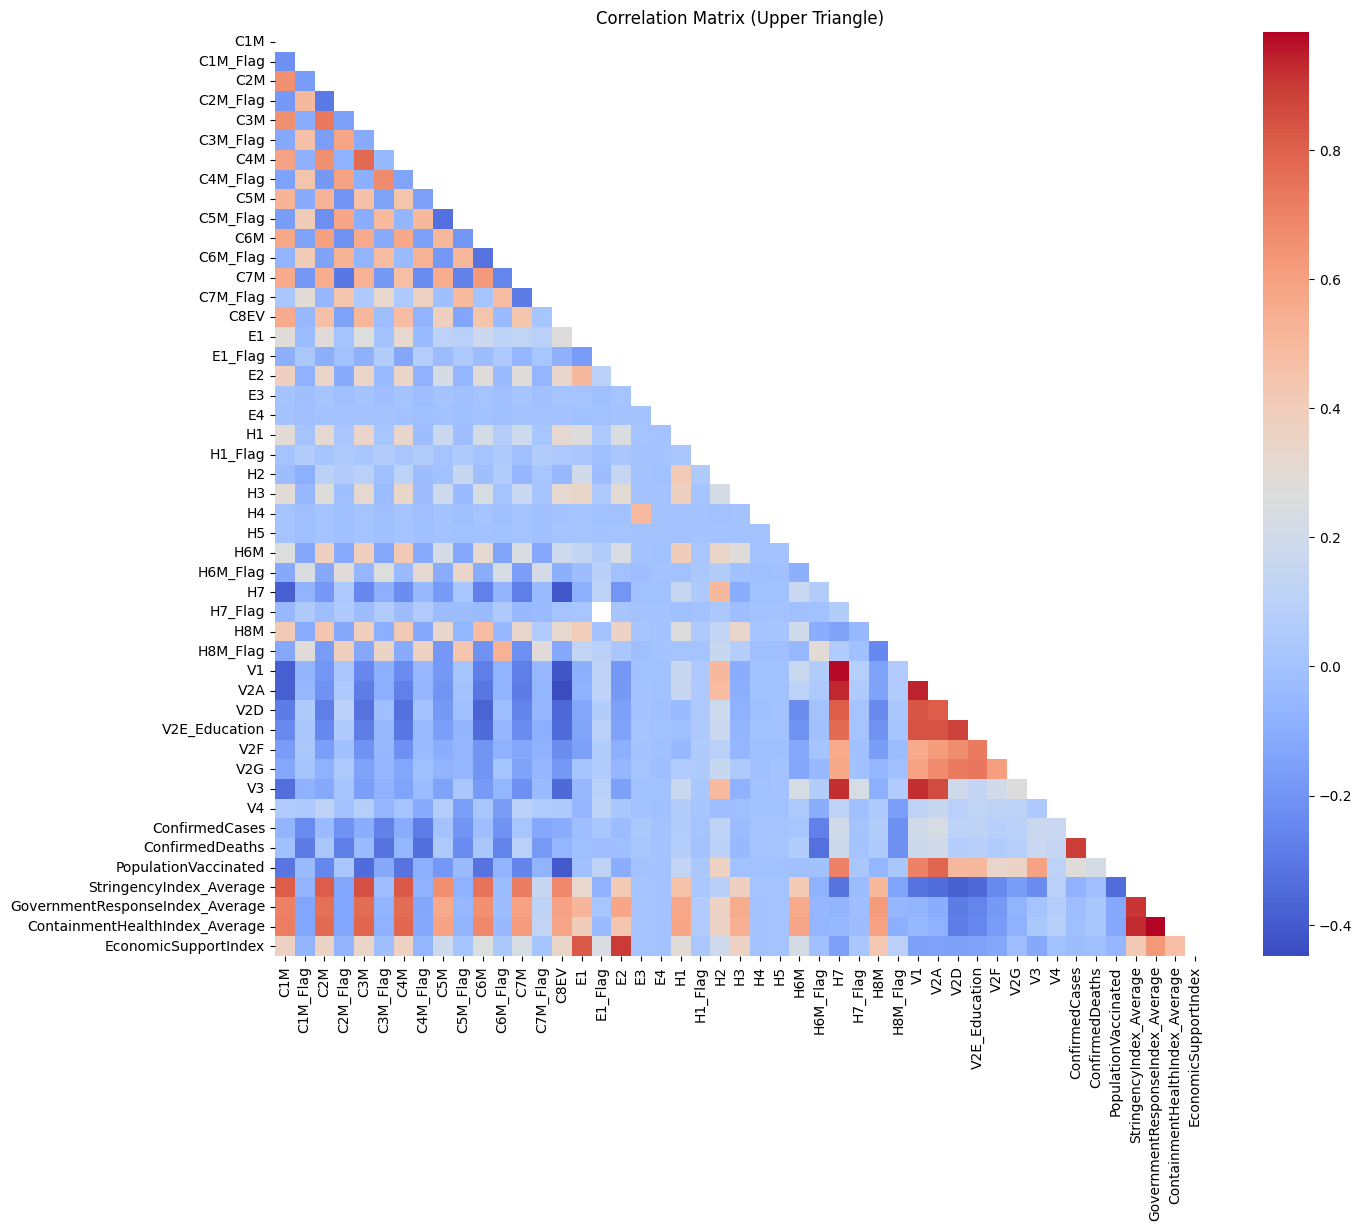

Columns: C7M and GovernmentResponseIndex_Average, Correlation Coefficient: 0.59
Columns: C4M and C5M, Correlation Coefficient: 0.45
Columns: E1 and EconomicSupportIndex, Correlation Coefficient: 0.82
Columns: C3M and C8EV, Correlation Coefficient: 0.51
Columns: ContainmentHealthIndex_Average and H1, Correlation Coefficient: 0.58
Columns: C6M and C7M, Correlation Coefficient: 0.62
Columns: E2 and GovernmentResponseIndex_Average, Correlation Coefficient: 0.58
Columns: H7 and V3, Correlation Coefficient: 0.92
Columns: C6M and GovernmentResponseIndex_Average, Correlation Coefficient: 0.66
Columns: C2M_Flag and C5M_Flag, Correlation Coefficient: 0.58
Columns: ConfirmedCases and ConfirmedDeaths, Correlation Coefficient: 0.89
Columns: C3M and C6M, Correlation Coefficient: 0.56
Columns: C2M_Flag and C4M_Flag, Correlation Coefficient: 0.59
Columns: C5M_Flag and C7M_Flag, Correlation Coefficient: 0.49
Columns: H2 and V3, Correlation Coefficient: 0.49
Columns: V2A and V2G, Correlation Coefficient

142

In [134]:
corr_matrix = df.corr(numeric_only=True)

# Mask to display only one half
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=False) # since we've too many variables here. However, we shall display pairs having a correlation coefficient more or less than a certain threshold.
plt.title('Correlation Matrix (Upper Triangle)')
plt.show()

# pairs of columns with a correlation coefficient >= 0.4 or <= -0.4
high_correlation_pairs = []

for row in corr_matrix.columns:
    for col in corr_matrix.columns:
        if row != col:
            if corr_matrix.loc[row, col] >= 0.4 or corr_matrix.loc[row, col] <= -0.4:
                high_correlation_pairs.append((row, col, corr_matrix.loc[row, col]))

unique_pairs = set()
for pair in high_correlation_pairs:
    sorted_pair = tuple(sorted([pair[0], pair[1]])) + (pair[2],)
    unique_pairs.add(sorted_pair)

for pair in unique_pairs:
    print(f"Columns: {pair[0]} and {pair[1]}, Correlation Coefficient: {pair[2]:.2f}")

len(unique_pairs)

In [135]:
aggregation_funcs = {}
for column in df.columns:
    if pd.api.types.is_categorical_dtype(df[column]):
      aggregation_funcs[column] = 'count'
    elif pd.api.types.is_datetime64_dtype(df[column]):
      continue
    else:
      aggregation_funcs[column] = 'sum'

### TSA

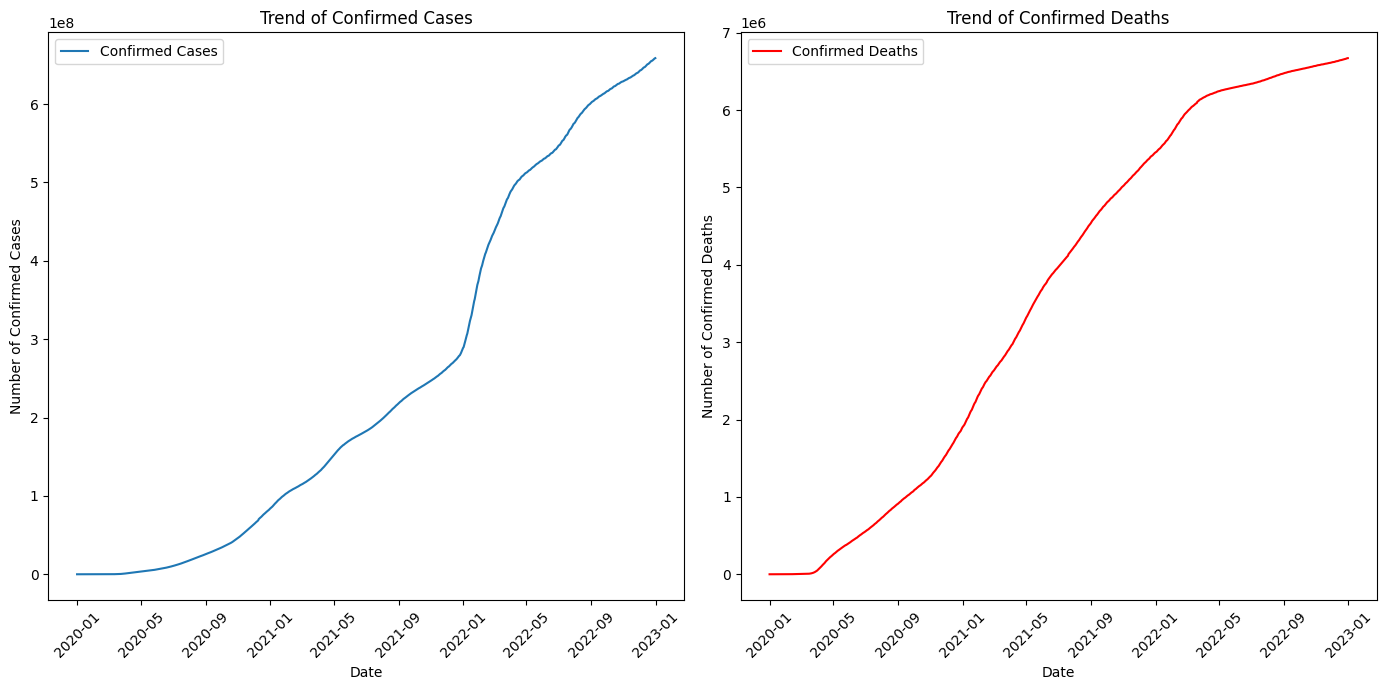

In [136]:
# Aggregating data by date
df_agg_date = df.groupby('Date').agg(aggregation_funcs)

# Plotting ConfirmedCases and ConfirmedDeaths
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(df_agg_date.index, df_agg_date['ConfirmedCases'], label='Confirmed Cases')
plt.title('Trend of Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df_agg_date.index, df_agg_date['ConfirmedDeaths'], label='Confirmed Deaths', color='red')
plt.title('Trend of Confirmed Deaths')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Deaths')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


In [137]:
print('The total number of covid-19 cases in our dataset are {}'.format(df_agg_date['ConfirmedCases'].iloc[-1]))

The total number of covid-19 cases in our dataset are 658625599.0


In [138]:
df_agg_date.describe()

CountryCode          C1M     C1M_Flag          C2M     C2M_Flag  \
count       1096.0  1096.000000  1096.000000  1096.000000  1096.000000   
mean         183.0   219.108577    96.454380   209.681569    95.968066   
std            0.0   139.986399    47.787961   103.218763    37.706459   
min          183.0     0.000000     0.000000     0.000000     0.000000   
25%          183.0    68.000000    44.000000   102.500000    64.000000   
50%          183.0   220.500000   108.000000   247.000000   114.000000   
75%          183.0   309.000000   131.000000   283.000000   120.000000   
max          183.0   531.000000   174.000000   430.000000   147.000000   

               C3M     C3M_Flag          C4M     C4M_Flag          C5M  \
count  1096.000000  1096.000000  1096.000000  1096.000000  1096.000000   
mean    201.281934   107.023723   367.351277    94.137774    76.463504   
std      98.733569    47.801104   207.057413    49.242408    49.451332   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      99.000000    62.750000   132.000000    41.000000    24.750000   
50%     243.000000   130.000000   481.500000   117.000000    89.500000   
75%     274.000000   140.000000   544.000000   131.000000   106.000000   
max     353.000000   172.000000   603.000000   159.000000   214.000000   

          C5M_Flag          C6M     C6M_Flag          C7M     C7M_Flag  \
count  1096.000000  1096.000000  1096.000000  1096.000000  1096.000000   
mean     43.784672   135.310219    56.682482   106.073905    35.384124   
std      26.974149    91.460881    39.942121    73.042360    27.451997   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      15.000000    27.000000     9.000000    26.000000     6.000000   
50%      48.000000   175.000000    66.000000   124.000000    39.000000   
75%      63.000000   205.000000    88.000000   155.000000    51.000000   
max     111.000000   325.000000   137.000000   296.000000   121.000000   

              C8EV           E1      E1_Flag           E2            E3  \
count  1096.000000  1096.000000  1096.000000  1096.000000  1.096000e+03   
mean    339.311131   123.248175    56.715328   129.569343  1.386795e+10   
std     175.664798    54.610305    21.280196    66.090313  1.176814e+11   
min       2.000000     0.000000     0.000000     0.000000 -1.000000e-02   
25%     172.500000    79.000000    39.000000    63.000000  0.000000e+00   
50%     360.000000   131.500000    66.000000   135.000000  0.000000e+00   
75%     457.000000   169.000000    72.000000   184.250000  0.000000e+00   
max     663.000000   192.000000    82.000000   224.000000  2.387742e+12   

                 E4           H1      H1_Flag           H2           H3  \
count  1.096000e+03  1096.000000  1096.000000  1096.000000  1096.000000   
mean   8.238546e+08   332.031022   172.414234   382.524635   209.016423   
std    2.523746e+10    63.480389    31.039494   108.114683    65.370638   
min   -2.000000e-02     5.000000     3.000000     1.000000     5.000000   
25%    0.000000e+00   338.750000   179.000000   343.000000   167.000000   
50%    0.000000e+00   351.000000   181.000000   432.000000   231.000000   
75%    0.000000e+00   357.000000   182.000000   458.000000   259.000000   
max    8.347756e+11   362.000000   183.000000   474.000000   283.000000   

                 H4            H5          H6M     H6M_Flag           H7  \
count  1.096000e+03  1.096000e+03  1096.000000  1096.000000  1096.000000   
mean   7.731211e+08  7.433536e+07   406.842153   139.488139   512.133212   
std    9.223503e+09  7.148161e+08   149.752794    44.596741   407.272187   
min   -1.000000e-02 -7.000000e-02     1.000000     0.000000     0.000000   
25%    0.000000e+00  0.000000e+00   344.000000   139.000000     0.000000   
50%    0.000000e+00  0.000000e+00   481.000000   153.500000   731.000000   
75%    0.000000e+00  0.000000e+00   517.000000   166.000000   902.000000   
max    2.461622e+11  1.575000e+10   544.000000

In [139]:
df_agg_date.tail()
df_monthly = df_agg_date.resample('M').mean()
df_monthly.head(25)
#df_monthly.tail(25)

CountryCode         C1M    C1M_Flag         C2M    C2M_Flag  \
Date                                                                      
2020-01-31        183.0    2.419355    0.838710    1.129032    0.483871   
2020-02-29        183.0   25.724138    6.000000   10.482759    4.034483   
2020-03-31        183.0  298.935484   94.322581  167.806452   67.774194   
2020-04-30        183.0  525.300000  172.133333  415.466667  144.833333   
2020-05-31        183.0  488.709677  163.870968  352.032258  134.064516   
2020-06-30        183.0  423.333333  153.966667  286.366667  116.633333   
2020-07-31        183.0  391.548387  148.064516  265.290323  108.516129   
2020-08-31        183.0  387.903226  147.258065  282.483871  110.774194   
2020-09-30        183.0  345.166667  147.333333  273.500000  115.133333   
2020-10-31        183.0  310.516129  141.000000  259.290323  120.419355   
2020-11-30        183.0  301.300000  143.733333  269.600000  121.466667   
2020-12-31        183.0  313.741935  131.322581  284.354839  117.741935   
2021-01-31        183.0  327.935484  129.645161  293.322581  115.870968   
2021-02-28        183.0  300.142857  123.642857  289.214286  115.607143   
2021-03-31        183.0  285.354839  118.258065  299.354839  114.064516   
2021-04-30        183.0  285.300000  111.766667  305.900000  113.366667   
2021-05-31        183.0  264.032258  105.935484  295.258065  116.258065   
2021-06-30        183.0  262.933333  112.300000  279.200000  120.000000   
2021-07-31        183.0  254.096774  113.709677  266.548387  116.548387   
2021-08-31        183.0  239.903226  111.483871  254.193548  121.612903   
2021-09-30        183.0  217.066667  108.366667  247.566667  113.933333   
2021-10-31        183.0  193.774194  104.225806  230.709677  109.354839   
2021-11-30        183.0  183.033333  107.066667  222.866667  111.366667   
2021-12-31        183.0  185.290323  106.967742  219.161290  124.064516   
2022-01-31        183.0  191.806452  113.193548  233.870968  132.451613   

                   C3M    C3M_Flag         C4M    C4M_Flag         C5M  \
Date                                                                     
2020-01-31    1.967742    0.645161    1.612903    0.161290    0.580645   
2020-02-29   14.965517    6.000000    8.551724    1.620690    2.620690   
2020-03-31  202.322581   95.774194  261.129032   75.096774   67.322581   
2020-04-30  349.333333  170.266667  592.566667  155.333333  207.266667   
2020-05-31  341.516129  166.483871  592.096774  153.935484  174.483871   
2020-06-30  304.200000  154.933333  516.733333  138.966667  142.033333   
2020-07-31  275.903226  144.612903  487.000000  127.161290  123.774194   
2020-08-31  271.483871  139.741935  497.677419  123.967742  114.387097   
2020-09-30  270.066667  138.766667  499.033333  123.933333   98.066667   
2020-10-31  264.709677  139.322581  517.645161  127.387097   87.580645   
2020-11-30  266.966667  142.700000  537.166667  131.333333   84.366667   
2020-12-31  274.258065  141.000000  546.612903  131.709677   93.000000   
2021-01-31  276.838710  136.387097  558.064516  131.548387   96.419355   
2021-02-28  276.750000  134.678571  559.571429  132.357143  100.142857   
2021-03-31  282.967742  137.258065  562.612903  132.903226  100.516129   
2021-04-30  283.733333  139.700000  564.333333  134.300000  111.966667   
2021-05-31  274.612903  137.451613  560.161290  135.548387  112.645161   
2021-06-30  262.266667  142.666667  546.233333  133.733333  103.700000   
2021-07-31  252.451613  131.483871  528.193548  126.645161   94.096774   
2021-08-31  243.096774  131.193548  514.451613  126.387097  104.677419   
2021-09-30  244.800000  127.833333  485.133333  113.033333  106.866667   
2021-10-31  239.032258  129.354839  456.741935  115.612903   96.838710   
2021-11-30  227.833333  127.566667  428.833333  112.566667   78.300000   
2021-12-31  220.612903  128.322581  423.548387  114.870968   69.354839   
2022-01-31  221.290323  131.419355  424.548387  115.000000   6

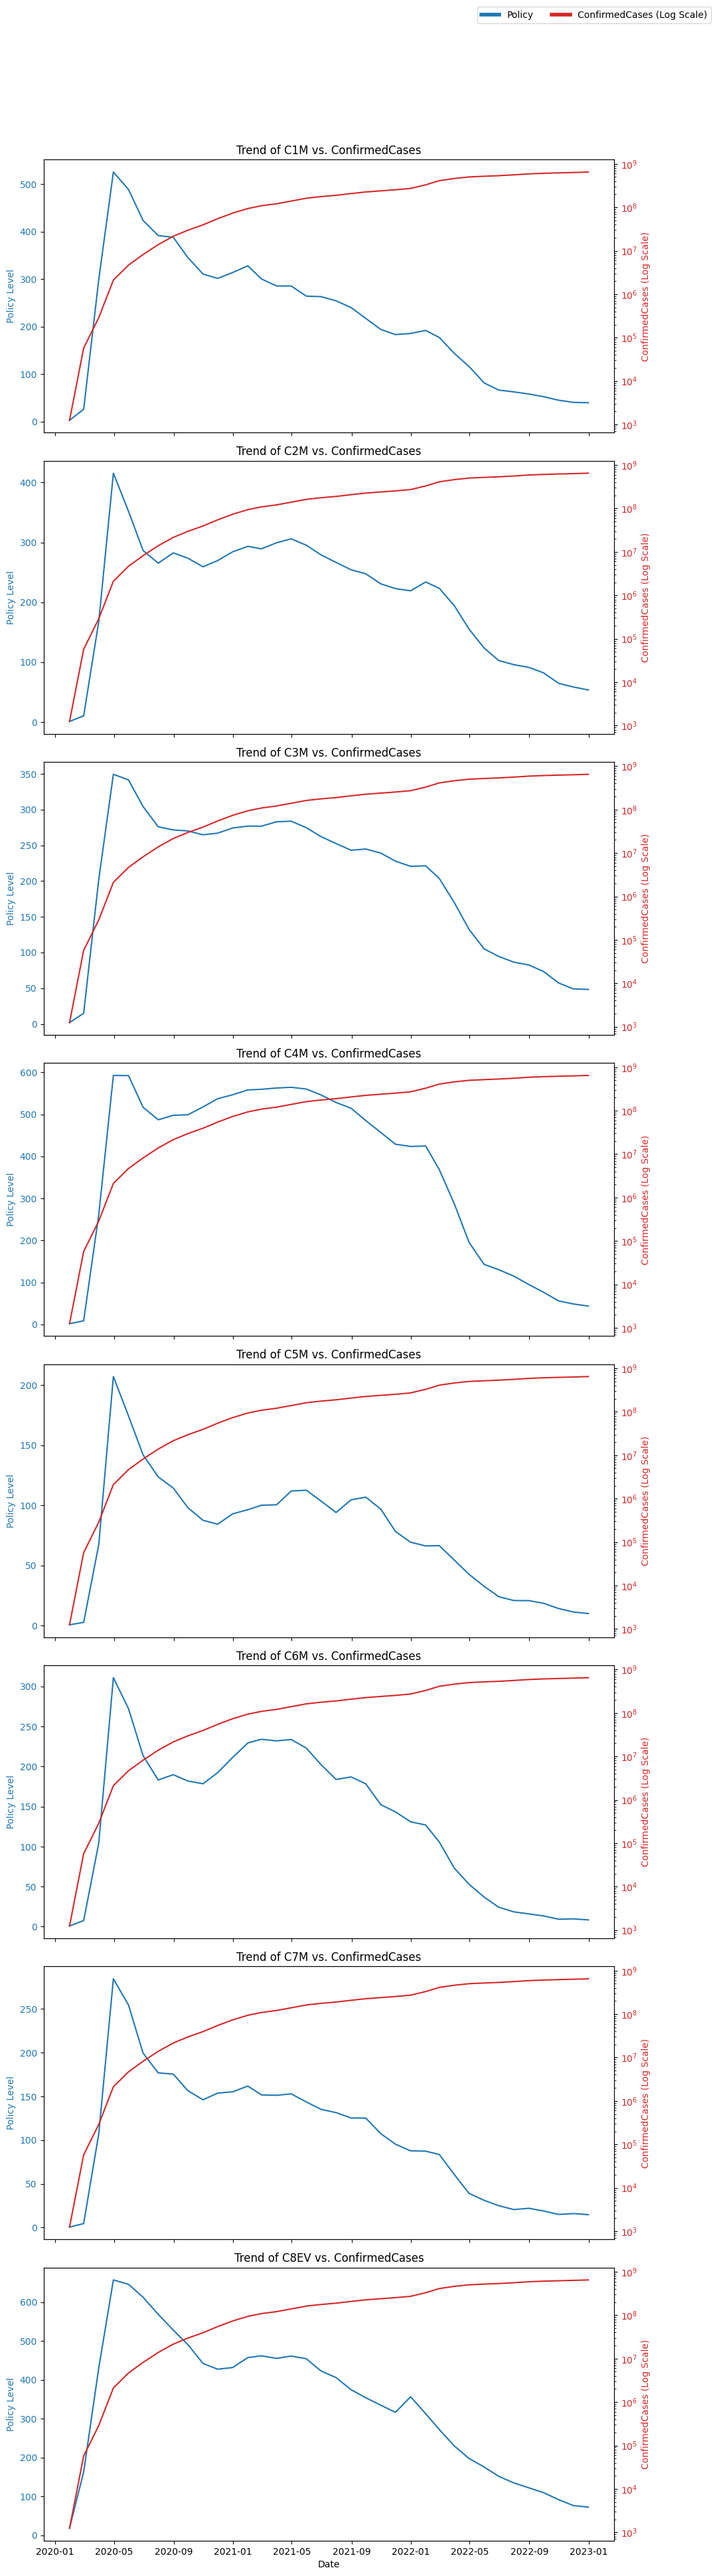

In [140]:
containment_policy_columns = ['C1M', 'C2M', 'C3M',
                  'C4M', 'C5M',
                  'C6M', 'C7M',
                  'C8EV']

fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(10, 40), sharex=True)

for i, policy in enumerate(containment_policy_columns):
    sns.lineplot(ax=axes[i], data=df_monthly, x=df_monthly.index, y=policy, color='tab:blue')
    axes[i].set_ylabel('Policy Level', color='tab:blue')
    axes[i].tick_params(axis='y', labelcolor='tab:blue')

    ax2 = axes[i].twinx()
    sns.lineplot(ax=ax2, data=df_monthly, x=df_monthly.index, y='ConfirmedCases', color='tab:red')
    ax2.set_yscale('log')
    ax2.set_ylabel('ConfirmedCases (Log Scale)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    axes[i].set_title(f'Trend of {policy} vs. ConfirmedCases')


custom_lines = [Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:red', lw=4)]


fig.legend(custom_lines, ['Policy', 'ConfirmedCases (Log Scale)'], loc='upper center', ncol=2, bbox_to_anchor=(0.9, 1))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



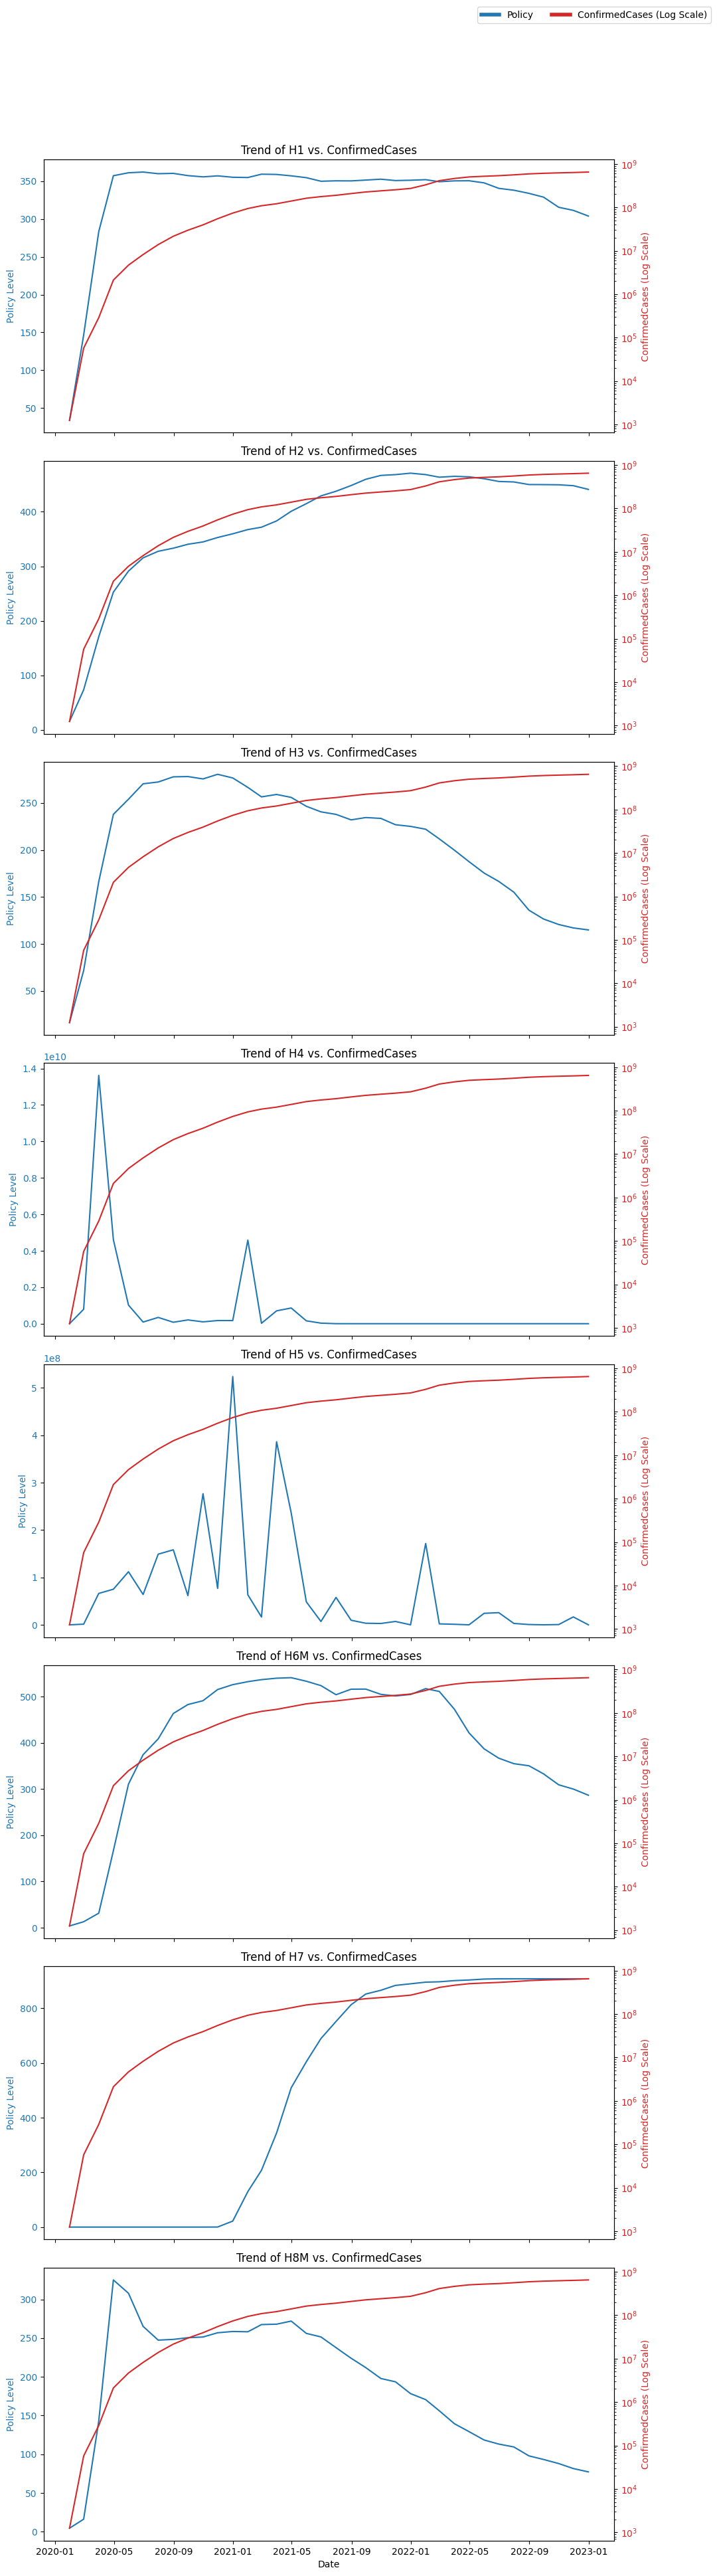

In [141]:
health_policy_columns = ['H1', 'H2', 'H3', 'H4', 'H5', 'H6M', 'H7', 'H8M']

fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(10, 40), sharex=True)

for i, policy in enumerate(health_policy_columns):
    sns.lineplot(ax=axes[i], data=df_monthly, x=df_monthly.index, y=policy, color='tab:blue')
    axes[i].set_ylabel('Policy Level', color='tab:blue')
    axes[i].tick_params(axis='y', labelcolor='tab:blue')

    ax2 = axes[i].twinx()
    sns.lineplot(ax=ax2, data=df_monthly, x=df_monthly.index, y='ConfirmedCases', color='tab:red')
    ax2.set_yscale('log')
    ax2.set_ylabel('ConfirmedCases (Log Scale)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    axes[i].set_title(f'Trend of {policy} vs. ConfirmedCases')



custom_lines = [Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:red', lw=4)]


fig.legend(custom_lines, ['Policy', 'ConfirmedCases (Log Scale)'], loc='upper center', ncol=2, bbox_to_anchor=(0.9, 1))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()





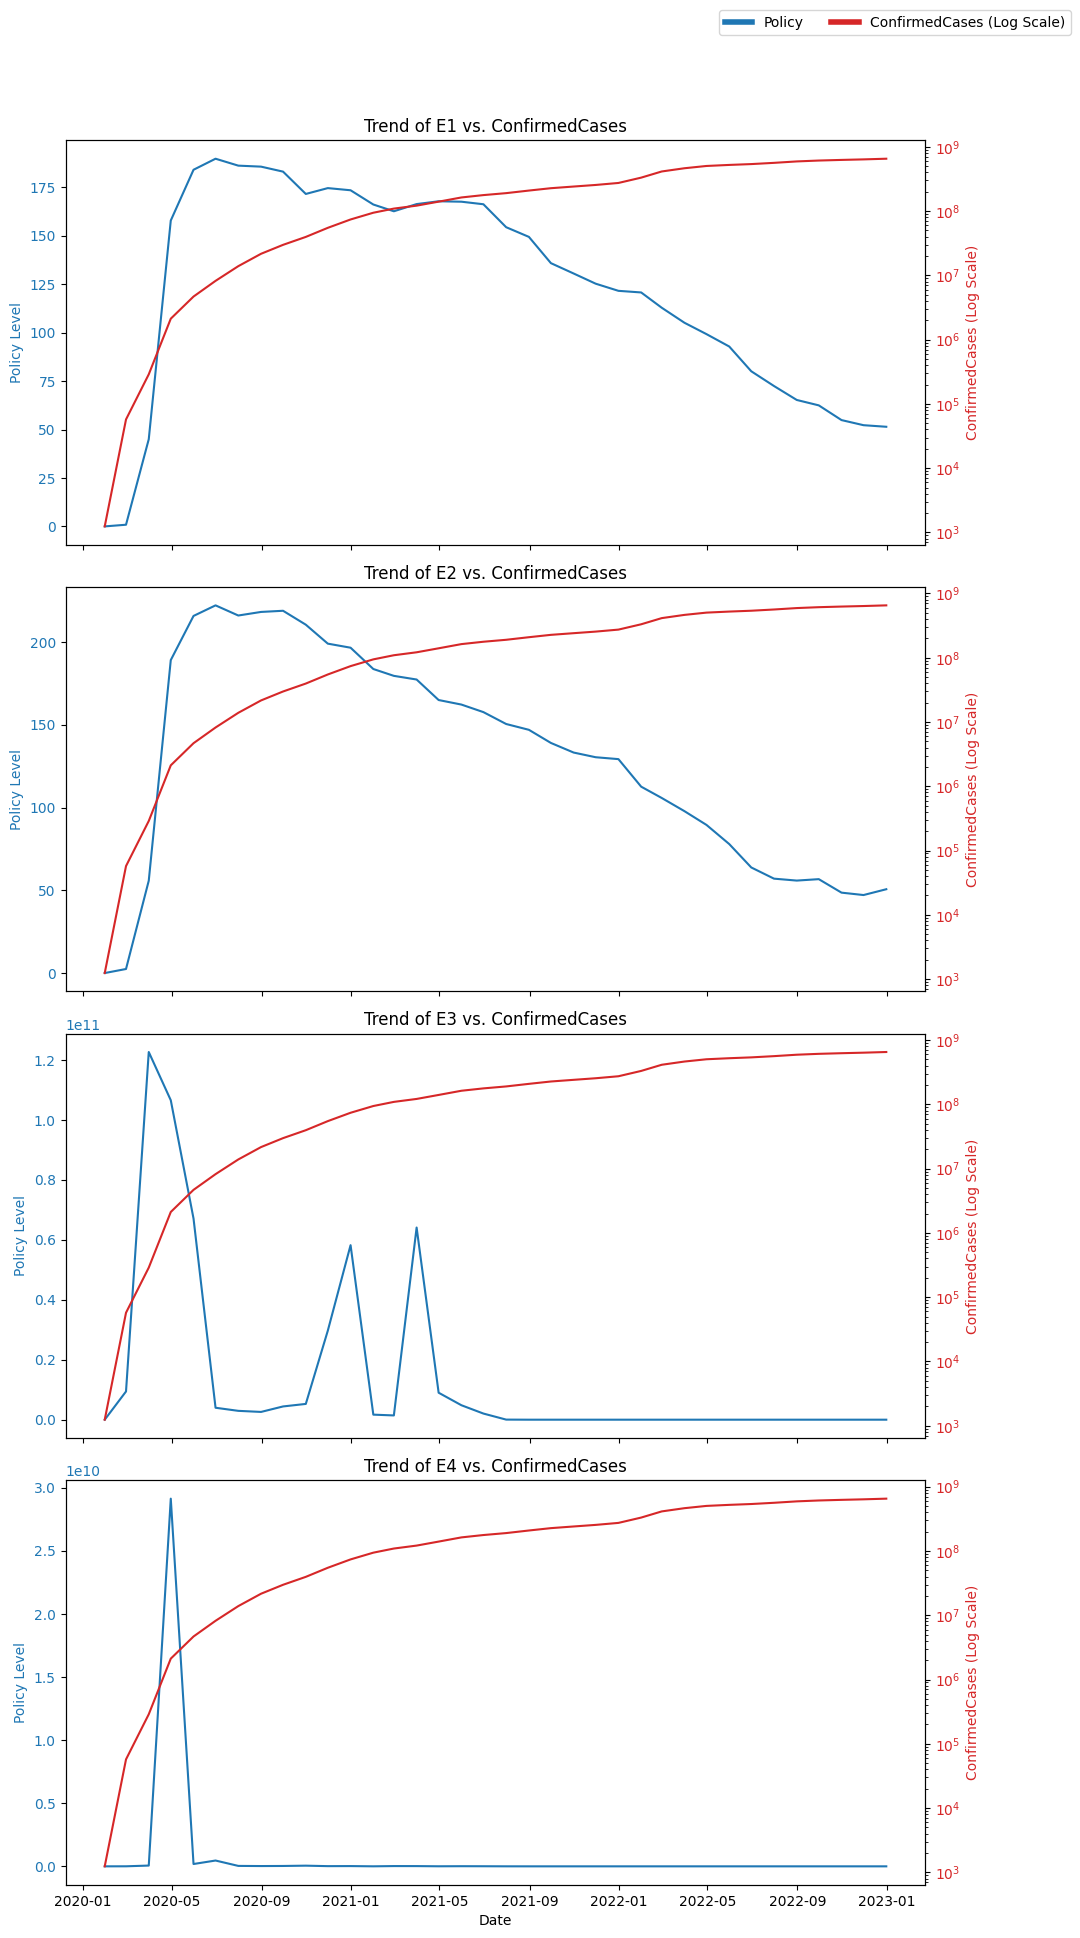

In [142]:
economic_policy_columns = ['E1','E2', 'E3', 'E4']
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 20), sharex=True)

# Iterate over policies and create a line plot for each
for i, policy in enumerate(economic_policy_columns):
    sns.lineplot(ax=axes[i], data=df_monthly, x=df_monthly.index, y=policy, color='tab:blue')
    axes[i].set_ylabel('Policy Level', color='tab:blue')
    axes[i].tick_params(axis='y', labelcolor='tab:blue')

    # Create a secondary y-axis for confirmed cases with log scale
    ax2 = axes[i].twinx()
    sns.lineplot(ax=ax2, data=df_monthly, x=df_monthly.index, y='ConfirmedCases', color='tab:red')
    ax2.set_yscale('log')
    ax2.set_ylabel('ConfirmedCases (Log Scale)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    axes[i].set_title(f'Trend of {policy} vs. ConfirmedCases')


# Create custom lines for the legend
custom_lines = [Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:red', lw=4)]


fig.legend(custom_lines, ['Policy', 'ConfirmedCases (Log Scale)'], loc='upper center', ncol=2, bbox_to_anchor=(0.9, 1))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [143]:
df_monthly.head(1)

CountryCode       C1M  C1M_Flag       C2M  C2M_Flag       C3M  \
Date                                                                        
2020-01-31        183.0  2.419355   0.83871  1.129032  0.483871  1.967742   

            C3M_Flag       C4M  C4M_Flag       C5M  C5M_Flag       C6M  \
Date                                                                     
2020-01-31  0.645161  1.612903   0.16129  0.580645       0.0  0.903226   

            C6M_Flag       C7M  C7M_Flag       C8EV   E1  E1_Flag   E2   E3  \
Date                                                                          
2020-01-31  0.419355  0.580645       0.0  18.387097  0.0      0.0  0.0  0.0   

             E4         H1    H1_Flag         H2         H3             H4  \
Date                                                                         
2020-01-31  0.0  33.806452  19.870968  15.516129  16.354839  580780.774194   

                     H5       H6M  H6M_Flag   H7  H7_Flag       H8M  H8M_Flag  \
Date                                                                            
2020-01-31  7966.483871  3.709677  1.870968  0.0      0.0  4.612903  2.096774   

             V1  V2A  V2B  V2C  V2D  V2E_Education  V2F  V2G   V3   V4  \
Date                                                                     
2020-01-31  0.0  0.0  0.0  0.0  0.0            0.0  0.0  0.0  1.0  0.0   

            ConfirmedCases  ConfirmedDeaths  MajorityVaccinated  \
Date                                                              
2020-01-31     1243.774194        28.741935               183.0   

            PopulationVaccinated  StringencyIndex_Average  \
Date                                                        
2020-01-31                   0.0               266.874194   

            GovernmentResponseIndex_Average  ContainmentHealthIndex_Average  \
Date                                                                          
2020-01-31                       247.980323                      283.432903   

            EconomicSupportIndex  
Date                              
2020-01-31                   0.0

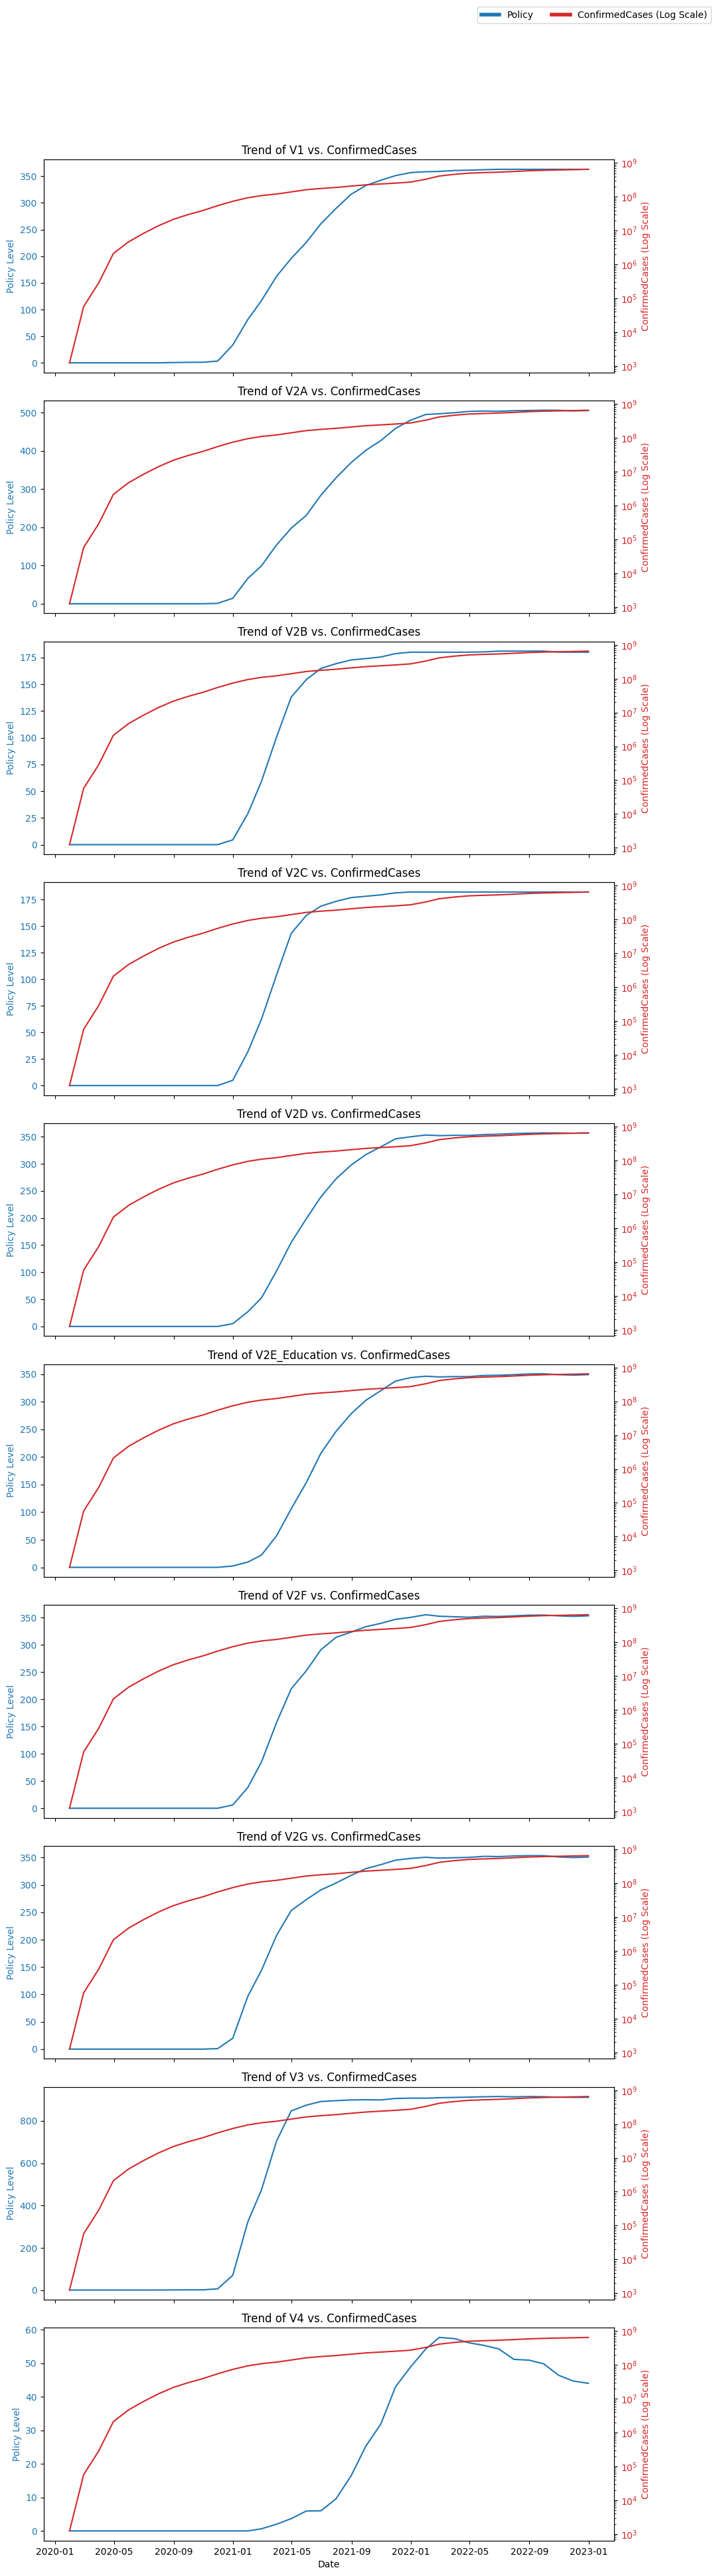

In [144]:
vaccination_policy_columns = ['V1', 'V2A', 'V2B','V2C','V2D', 'V2E_Education','V2F', 'V2G', 'V3', 'V4']
fig, axes = plt.subplots(nrows=len(vaccination_policy_columns), ncols=1, figsize=(10, 40), sharex=True)

# Iterate over policies and create a line plot for each
for i, policy in enumerate(vaccination_policy_columns):
    sns.lineplot(ax=axes[i], data=df_monthly, x=df_monthly.index, y=policy, color='tab:blue')
    axes[i].set_ylabel('Policy Level', color='tab:blue')
    axes[i].tick_params(axis='y', labelcolor='tab:blue')

    # Create a secondary y-axis for confirmed cases with log scale
    ax2 = axes[i].twinx()
    sns.lineplot(ax=ax2, data=df_monthly, x=df_monthly.index, y='ConfirmedCases', color='tab:red')
    ax2.set_yscale('log')
    ax2.set_ylabel('ConfirmedCases (Log Scale)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    axes[i].set_title(f'Trend of {policy} vs. ConfirmedCases')


# Create custom lines for the legend
custom_lines = [Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:red', lw=4)]


fig.legend(custom_lines, ['Policy', 'ConfirmedCases (Log Scale)'], loc='upper center', ncol=2, bbox_to_anchor=(0.9, 1))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

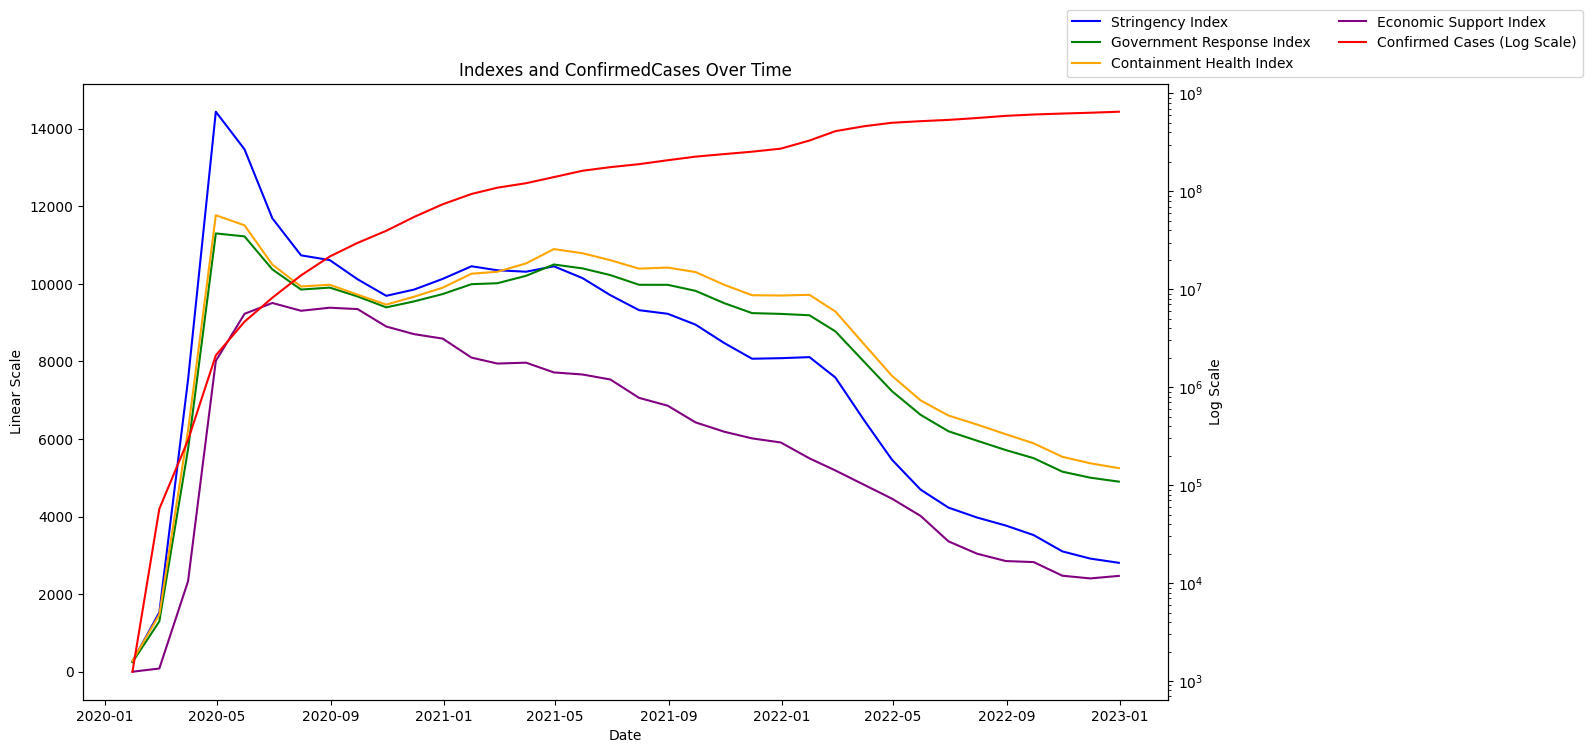

In [145]:
fig, ax1 = plt.subplots(figsize=(14, 8))

colors = ['blue', 'green', 'orange', 'purple', 'red']

sns.lineplot(x='Date', y='StringencyIndex_Average', data=df_monthly, color=colors[0], ax=ax1, label='Stringency Index', legend=None)
sns.lineplot(x='Date', y='GovernmentResponseIndex_Average', data=df_monthly, color=colors[1], ax=ax1, label='Government Response Index', legend=None)
sns.lineplot(x='Date', y='ContainmentHealthIndex_Average', data=df_monthly, color=colors[2], ax=ax1, label='Containment Health Index', legend=None)
sns.lineplot(x='Date', y='EconomicSupportIndex', data=df_monthly, color=colors[3], ax=ax1, label='Economic Support Index', legend=None)

ax1.set_title('Indexes and ConfirmedCases Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Linear Scale')

ax2 = ax1.twinx()
sns.lineplot(x='Date', y='ConfirmedCases', data=df_monthly, color=colors[4], ax=ax2, label='Confirmed Cases (Log Scale)', legend=None)
ax2.set_ylabel('Log Scale')
ax2.set_yscale('log')


lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best', ncol=2, bbox_to_anchor=(0.9, 1))

plt.show()

### EDA 2

In [146]:
aggregation_funcs_for_clustering = {}

for column in df.columns:
    if column == 'CountryCode' or pd.api.types.is_datetime64_dtype(df[column]):
      continue
    elif pd.api.types.is_categorical_dtype(df[column]):
      aggregation_funcs_for_clustering[column] = 'count'
    else:
      aggregation_funcs_for_clustering[column] = 'sum'

In [147]:
orld = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df2 = df.groupby('CountryCode').agg(aggregation_funcs_for_clustering)
df2.head()

C1M  C1M_Flag     C2M  C2M_Flag     C3M  C3M_Flag     C4M  \
CountryCode                                                                 
ABW           842.0     548.0  1067.0     710.0  1429.0    1008.0  2691.0   
AFG          1018.0     472.0  1629.0     254.0  1188.0     340.0   700.0   
AGO           891.0     378.0  2056.0     897.0  1352.0     874.0  2396.0   
ALB          1370.0     800.0  1309.0     798.0  1238.0     783.0  2685.0   
AND           860.0     706.0  1208.0     748.0  1057.0     727.0  1888.0   

             C4M_Flag    C5M  C5M_Flag     C6M  C6M_Flag     C7M  C7M_Flag  \
CountryCode                                                                  
ABW             865.0    0.0       0.0   724.0     456.0   235.0     167.0   
AFG             135.0  732.0     181.0   352.0       0.0   370.0      63.0   
AGO             510.0  673.0     625.0   996.0     750.0  1425.0     348.0   
ALB             783.0  262.0      73.0  1276.0     720.0   272.0     122.0   
AND             491.0  652.0     652.0   146.0     146.0    30.0      30.0   

               C8EV      E1  E1_Flag      E2           E3           E4  \
CountryCode                                                              
ABW          1486.0   802.0    158.0   532.0  271700000.0          0.0   
AFG          1488.0     0.0      0.0    31.0          0.0  152400000.0   
AGO          2623.0   386.0    386.0   184.0    9000000.0          0.0   
ALB          1293.0   753.0    644.0   841.0  540068949.8          0.0   
AND          1277.0  1492.0    606.0  1050.0  441291382.9  473499125.0   

                 H1  H1_Flag      H2      H3           H4           H5  \
CountryCode                                                              
ABW          2038.0   1019.0   993.0  1384.0          0.0          0.0   
AFG           756.0    531.0   705.0   396.0  248977750.0  113000000.0   
AGO          1907.0   1013.0  2244.0   306.0  240000000.0   88000000.0   
ALB          1889.0   1052.0  2073.0   995.0   26000000.0    6900000.0   
AND          1731.0    908.0  2952.0  1674.0    2621785.5          0.0   

                H6M  H6M_Flag      H7  H7_Flag     H8M  H8M_Flag    V1   V2A  \
CountryCode                                                                    
ABW          1965.0     866.0  3237.0    683.0  1035.0     401.0  1299  1902   
AFG          2439.0     921.0  3193.0    677.0   572.0     122.0  1324  1302   
AGO          3042.0     997.0  3118.0    668.0   454.0     351.0  1238  1612   
ALB          2537.0     999.0  2972.0    720.0  1648.0     810.0  1286  1651   
AND          2388.0     958.0  3267.0    711.0  1775.0    1012.0  1300  1783   

             V2B  V2C     V2D  V2E_Education     V2F     V2G    V3     V4  \
CountryCode                                                                 
ABW          683  683  1299.0         1232.0  1366.0  1366.0  3415    0.0   
AFG          625  625  1250.0         1281.0  1302.0  1302.0  3385    0.0   
AGO          661  661  1065.0         1072.0  1239.0  1072.0  3340  457.0   
ALB          713  713  1086.0         1185.0  1258.0  1247.0  3600  458.0   
AND          702  702  1268.0         1198.0  1314.0  1422.0  3465    0.0   

             ConfirmedCases  ConfirmedDeaths  MajorityVaccinated  \
CountryCode                                                        
ABW              19056043.0         128724.0                1096   
AFG             115803695.0        4885625.0                1096   
AGO              52873632.0        1100527.0                1096   
ALB             162838359.0        2240822.0                1096   
AND              21294890.0         115970.0                1096   

             PopulationVaccinated  StringencyIndex_Average  \
CountryCode                                                  
ABW                      43798.33                 41922.31   
AFG                       6615.74                 30024.46   
AGO                       7797.50                 56577.42   
ALB

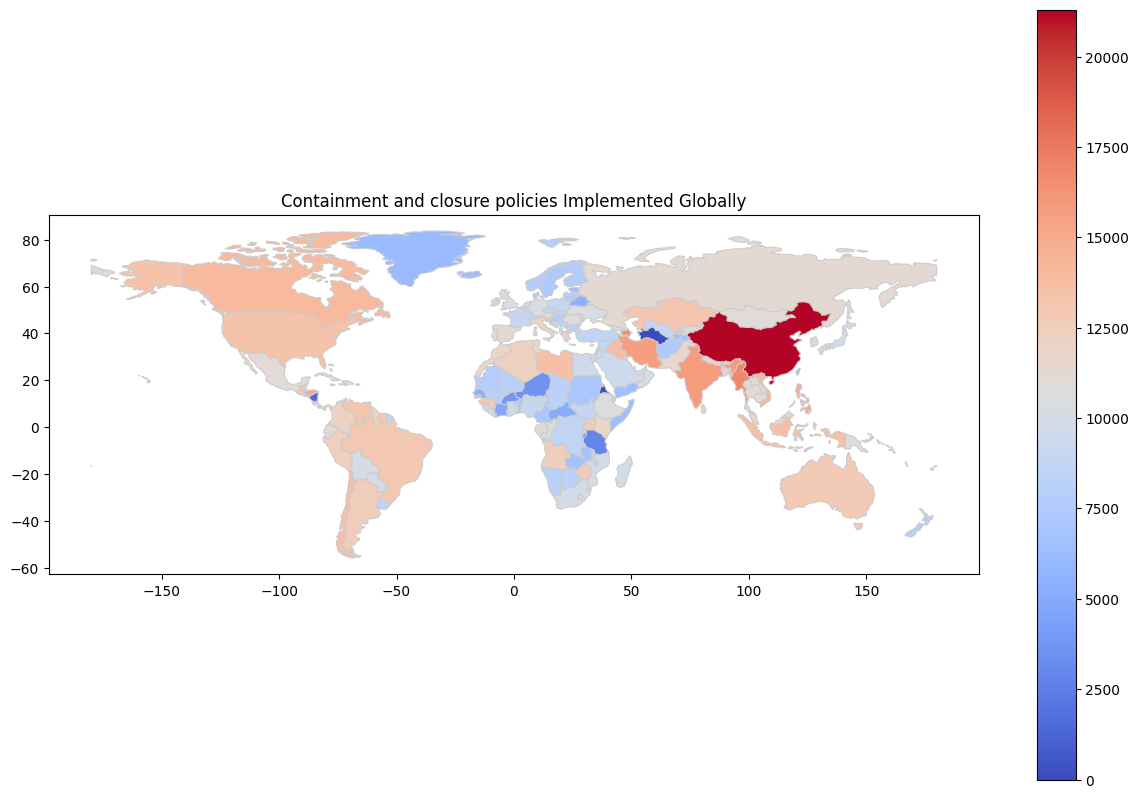

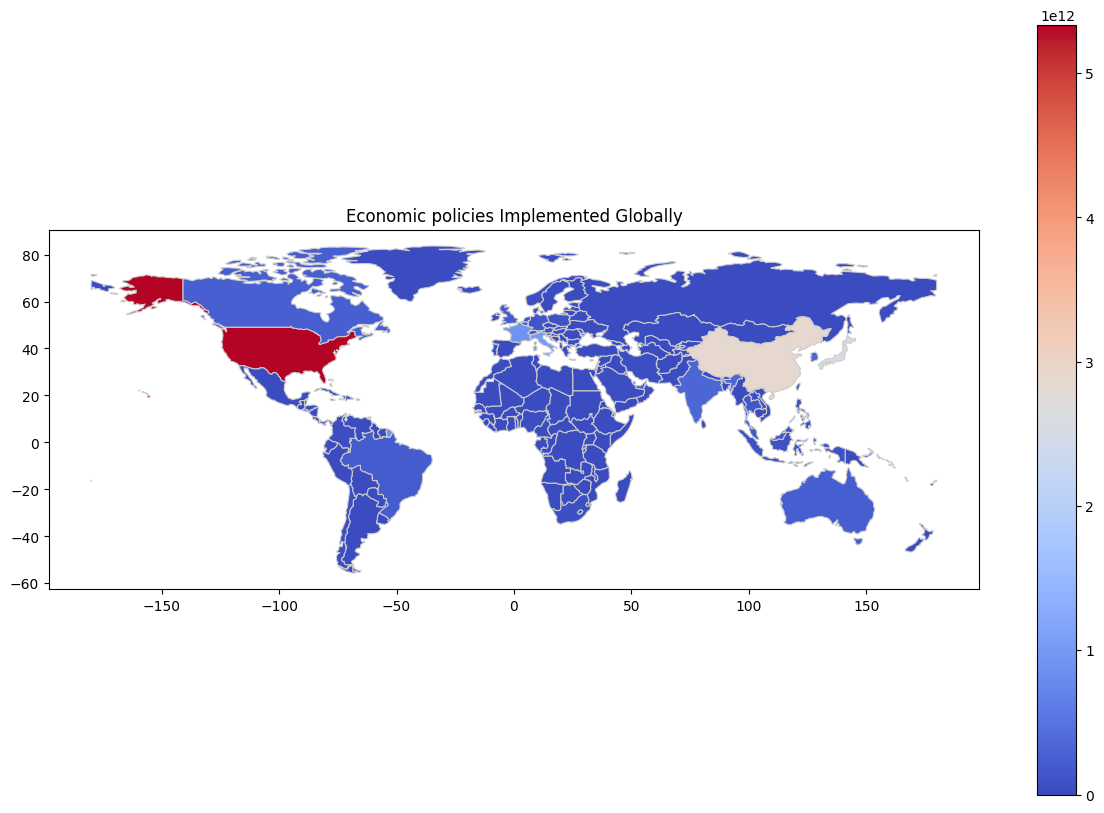

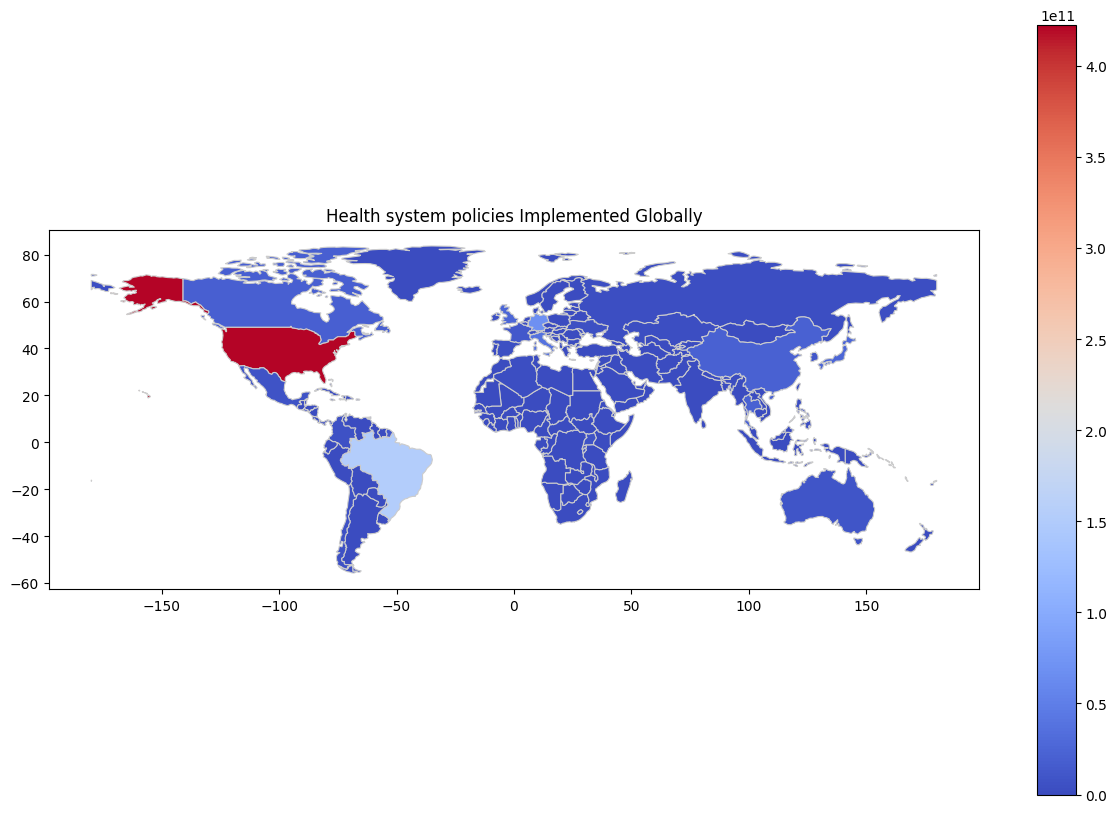

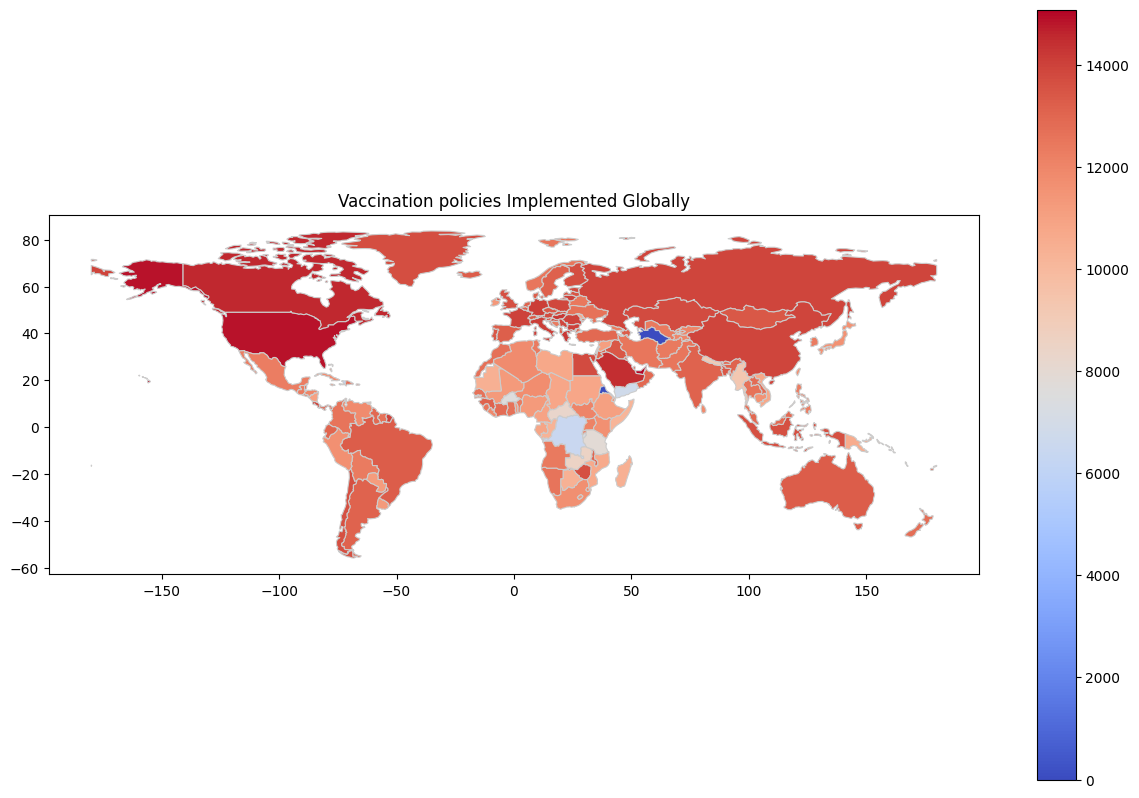

In [148]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

df2 = df.groupby('CountryCode').agg(aggregation_funcs_for_clustering)


df2['policy_c'] = df2[containment_policy_columns].sum(axis=1)
df2['policy_e'] = df2[economic_policy_columns].sum(axis=1)
df2['policy_h'] = df2[health_policy_columns].sum(axis=1)
df2['policy_v'] = df2[vaccination_policy_columns].sum(axis=1)

world = world.merge(df2, left_on='iso_a3', right_on='CountryCode')

policy_dict = {
    'c': ['policy_c', 'Containment and closure policies'],
    'e': ['policy_e', 'Economic policies'],
    'h': ['policy_h', 'Health system policies'],
    'v': ['policy_v', 'Vaccination policies']
}

for key, value in policy_dict.items():
  fig, ax = plt.subplots(1, 1, figsize=(15, 10))
  world.plot(column = policy_dict[key][0], cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, aspect='equal')
  ax.set_title(f'{policy_dict[key][1]} Implemented Globally')
  plt.show()


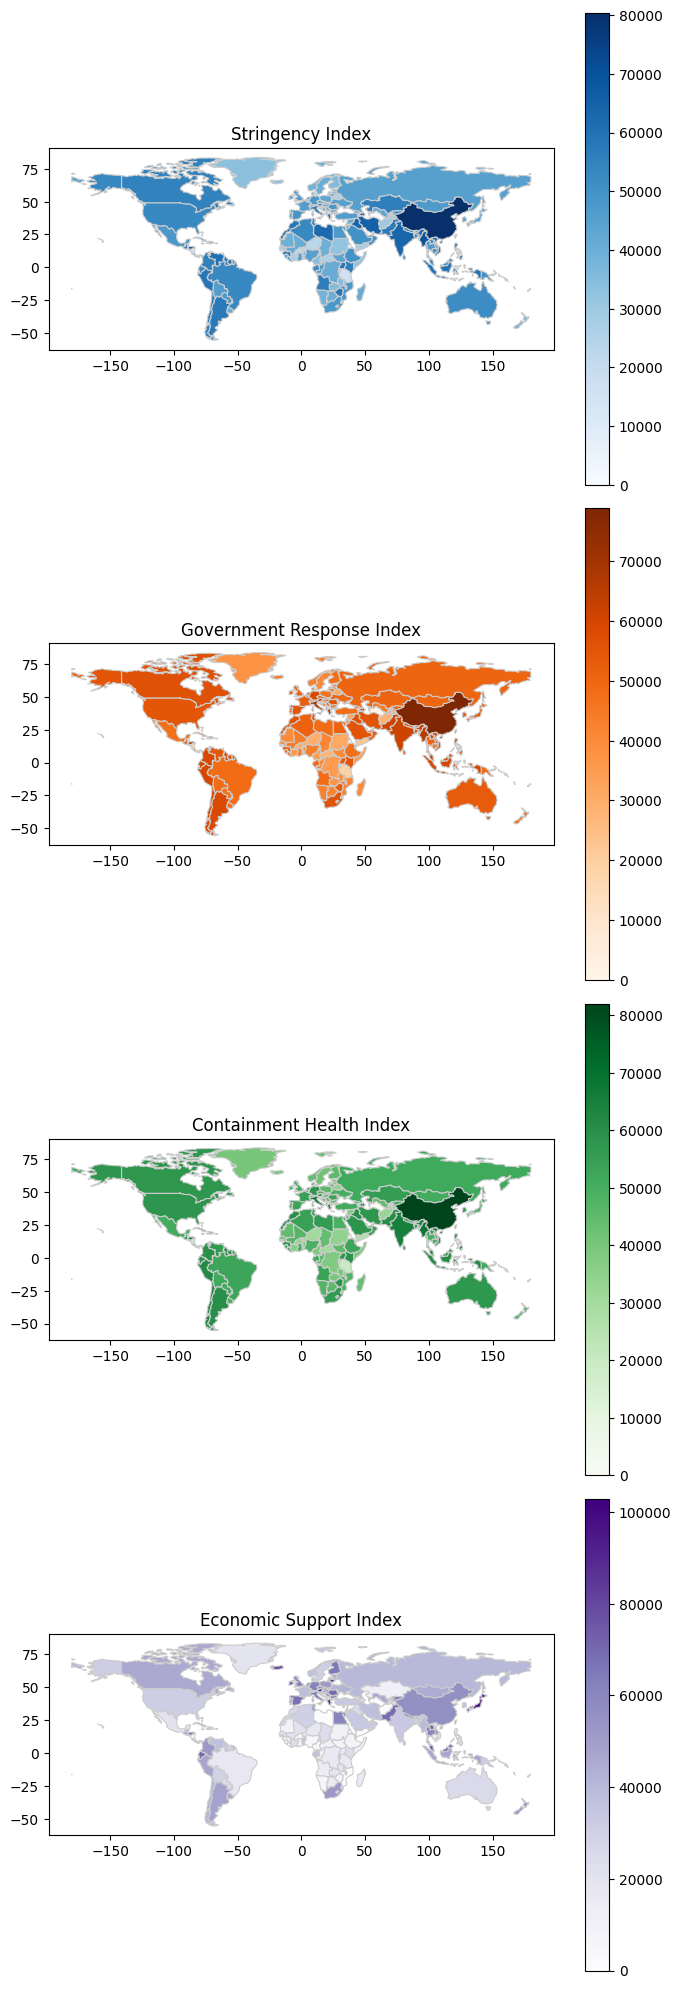

In [149]:
fig, axs = plt.subplots(4, 1, figsize=(7, 20))

world.plot(column='StringencyIndex_Average', cmap='Blues', linewidth=0.8, ax=axs[0], edgecolor='0.8', legend=True)
axs[0].set_title('Stringency Index')

world.plot(column='GovernmentResponseIndex_Average', cmap='Oranges', linewidth=0.8, ax=axs[1], edgecolor='0.8', legend=True)
axs[1].set_title('Government Response Index')

world.plot(column='ContainmentHealthIndex_Average', cmap='Greens', linewidth=0.8, ax=axs[2], edgecolor='0.8', legend=True)
axs[2].set_title('Containment Health Index')

world.plot(column='EconomicSupportIndex', cmap='Purples', linewidth=0.8, ax=axs[3], edgecolor='0.8', legend=True)
axs[3].set_title('Economic Support Index')

plt.tight_layout()
plt.show()


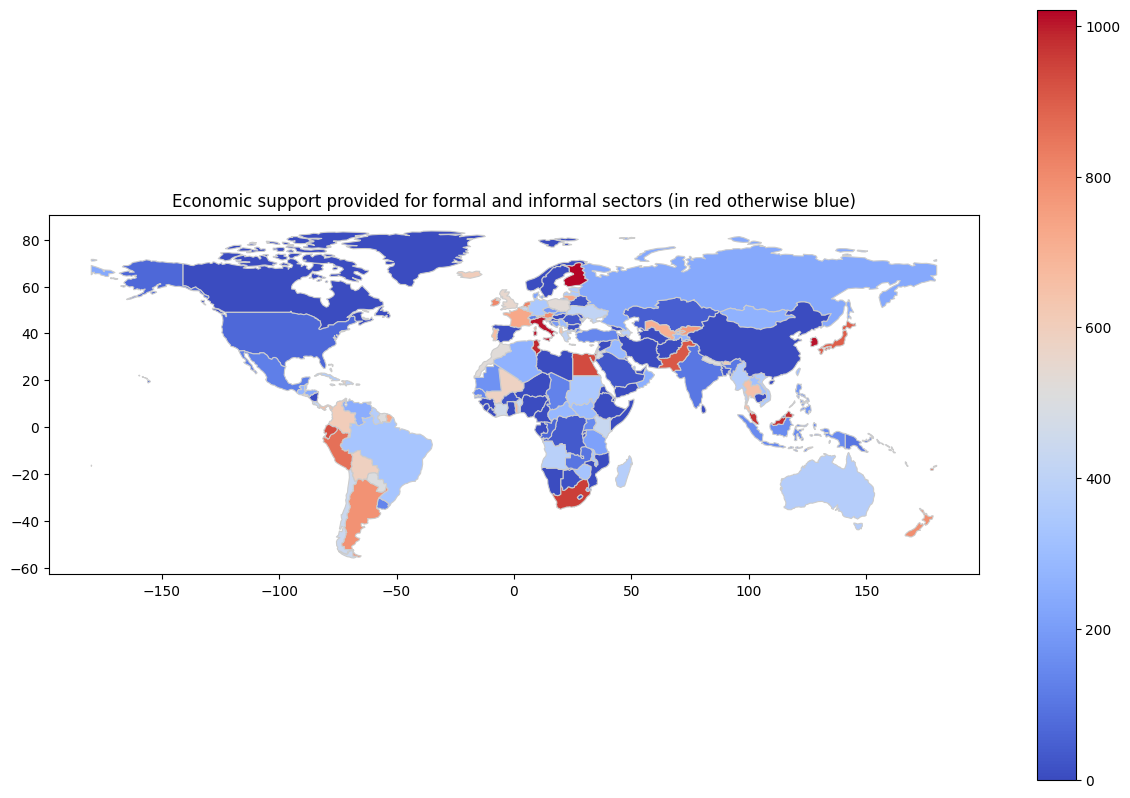

In [150]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='E1_Flag', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, aspect='equal')
ax.set_title('Economic support provided for formal and informal sectors (in red otherwise blue)')
plt.show()

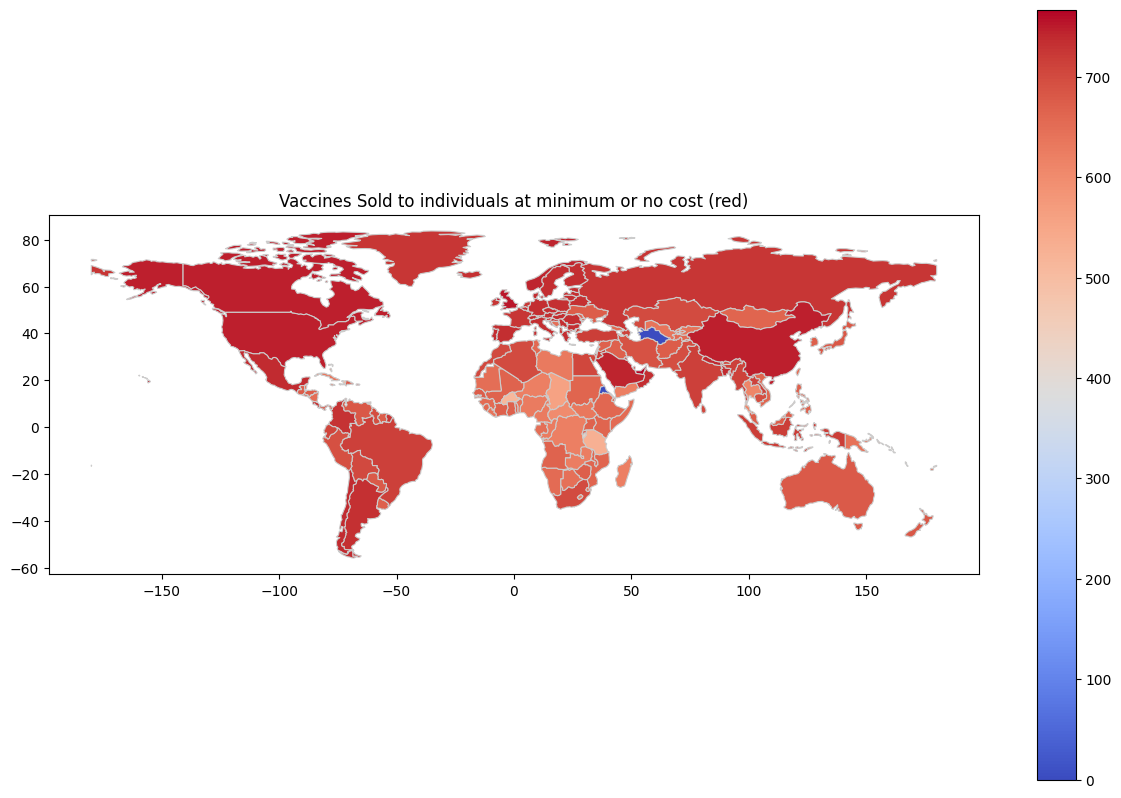

In [151]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='H7_Flag', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, aspect='equal')
ax.set_title('Vaccines Sold to individuals at minimum or no cost (red)')
plt.show()

In [152]:
world.describe()

pop_est    gdp_md_est          C1M     C1M_Flag          C2M  \
count  1.630000e+02  1.630000e+02   163.000000   163.000000   163.000000   
mean   4.669552e+07  5.350829e+05  1307.515337   556.509202  1261.337423   
std    1.572663e+08  2.099533e+06   515.500768   239.923351   499.830295   
min    5.622500e+04  9.340000e+02     0.000000     0.000000     0.000000   
25%    4.831092e+06  1.564050e+04   951.500000   393.000000  1006.500000   
50%    1.106211e+07  5.792100e+04  1294.000000   570.000000  1298.000000   
75%    3.392459e+07  2.924445e+05  1669.500000   733.000000  1547.000000   
max    1.397715e+09  2.143323e+07  2913.000000  1021.000000  2862.000000   

          C2M_Flag          C3M     C3M_Flag          C4M     C4M_Flag  \
count   163.000000   163.000000   163.000000   163.000000   163.000000   
mean    558.460123  1201.276074   619.159509  2155.460123   541.705521   
std     269.595473   392.935993   251.560044   793.932611   269.790772   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     342.500000  1012.500000   493.500000  1865.000000   365.500000   
50%     580.000000  1228.000000   650.000000  2251.000000   614.000000   
75%     767.000000  1433.000000   791.500000  2621.500000   718.000000   
max    1021.000000  2129.000000  1027.000000  4222.000000  1021.000000   

               C5M    C5M_Flag          C6M    C6M_Flag          C7M  \
count   163.000000  163.000000   163.000000  163.000000   163.000000   
mean    475.760736  262.760736   820.490798  321.742331   674.325153   
std     361.943619  225.801640   482.331969  225.200832   473.274708   
min       0.000000    0.000000     0.000000    0.000000     0.000000   
25%     188.000000   73.000000   461.000000  143.000000   309.000000   
50%     425.000000  218.000000   798.000000  295.000000   610.000000   
75%     704.000000  411.500000  1159.000000  479.000000   970.500000   
max    1745.000000  961.000000  2879.000000  871.000000  2040.000000   

        C7M_Flag         C8EV           E1      E1_Flag           E2  \
count  163.00000   163.000000   163.000000   163.000000   163.000000   
mean   214.91411  2017.871166   707.760736   322.760736   768.153374   
std    178.40751   531.032818   553.330286   305.080982   557.609078   
min      0.00000     0.000000     0.000000     0.000000     0.000000   
25%     85.00000  1709.000000   246.000000     8.500000   314.500000   
50%    176.00000  1967.000000   596.000000   284.000000   693.000000   
75%    299.00000  2329.000000  1006.000000   511.500000  1127.000000   
max    786.00000  3610.000000  2044.000000  1022.000000  2072.000000   

                 E3            E4           H1      H1_Flag           H2  \
count  1.630000e+02  1.630000e+02   163.000000   163.000000   163.000000   
mean   9.230732e+10  5.536633e+09  1957.871166  1019.092025  2227.484663   
std    5.001085e+11  6.585961e+10   299.976401   129.056252   585.702631   
min    0.000000e+00 -1.800000e-01     0.000000     0.000000     0.000000   
25%    1.549378e+08  0.000000e+00  1938.000000  1020.000000  1893.500000   
50%    1.170500e+09  0.000000e+00  2046.000000  1041.000000  2346.000000   
75%    1.407926e+10  5.113600e+06  2096.500000  1068.000000  2634.000000   
max    5.335200e+12  8.404422e+11  2182.000000  1095.000000  3127.000000   

                H3            H4            H5          H6M     H6M_Flag  \
count   163.000000  1.630000e+02  1.630000e+02   163.000000   163.000000   
mean   1197.895706  5.163749e+09  4.991577e+08  2436.656442   822.202454   
std     558.528563  3.443910e+10  2.136938e+09   725.815458   231.915432   
min       0.000000  0.000000e+00 -2.000000e-01     0.000000     0.000000   
25%     844.500000  8.756714e+06  0.000000e+00  2152.500000   743.000000   
50%    1205.000000  7.973382e+07  1.901220e+04  2545.000000   901.000000   
75%    1607.500000  3.941269e+08  3.521696e+07  2915.000000   979.000000   
max    2188.000000  4.068888e+11  1.608869e+10  3761.000000  1087.000